# Día 5 – Análisis Exploratorio de Datos (EDA) Completo
## Dataset de E-commerce

### Objetivo del análisis
Realizar un Análisis Exploratorio de Datos (EDA) completo sobre un conjunto de datos de e-commerce
con el fin de identificar patrones de ventas, comportamiento de clientes y oportunidades de mejora
para la toma de decisiones de negocio.

### Preguntas de negocio
- ¿Qué categorías de productos generan mayores ingresos?
- ¿Qué tipo de clientes aportan más valor al negocio?
- ¿Existen patrones temporales en las ventas?
- ¿Qué variables influyen más en el total de los pedidos?

### Alcance del análisis
- Período analizado: Año 2023
- Nivel de análisis: pedidos individuales
- Segmentaciones principales: categoría, tipo de cliente, región y tiempo

### Metodología
Se seguirá un framework estructurado de EDA:
1. Inspección inicial y calidad de datos
2. Análisis univariado
3. Análisis bivariado y multivariado
4. Identificación de patrones y outliers
5. Síntesis de insights y reporte ejecutivo

In [1]:
# ===============================
# PASO 2: CONFIGURACIÓN DEL ENTORNO
# ===============================

import pandas as pd
import numpy as np

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

print("Entorno configurado correctamente")

Entorno configurado correctamente


In [2]:
# ==================================
# CREACIÓN DEL DATASET DE E-COMMERCE
# ==================================

np.random.seed(42)
n_pedidos = 2500

# Generar fechas
fechas = pd.date_range('2023-01-01', periods=n_pedidos, freq='h')[:n_pedidos]

# Crear datos base
df = pd.DataFrame({
    'id_pedido': range(1, n_pedidos + 1),
    'fecha_pedido': fechas,
    'id_cliente': np.random.randint(1, 501, n_pedidos),
    'categoria': np.random.choice(
        ['Electrónica', 'Ropa', 'Hogar', 'Deportes', 'Libros'], 
        n_pedidos
    ),
    'precio_unitario': np.round(np.random.uniform(10, 1000, n_pedidos), 2),
    'cantidad': np.random.randint(1, 5, n_pedidos),
    'metodo_pago': np.random.choice(
        ['Tarjeta', 'PayPal', 'Efectivo', 'Transferencia'], 
        n_pedidos, 
        p=[0.6, 0.2, 0.15, 0.05]
    ),
    'region': np.random.choice(
        ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Bilbao'], 
        n_pedidos
    ),
    'tipo_cliente': np.random.choice(
        ['Regular', 'Premium', 'VIP'], 
        n_pedidos, 
        p=[0.7, 0.2, 0.1]
    )
})

# Variables derivadas
df['total_pedido'] = df['precio_unitario'] * df['cantidad']
df['mes'] = df['fecha_pedido'].dt.month
df['dia_semana'] = df['fecha_pedido'].dt.day_name()

print(f"Dataset creado con {len(df)} pedidos")
print(f"Período: {df['fecha_pedido'].min()} → {df['fecha_pedido'].max()}")

Dataset creado con 2500 pedidos
Período: 2023-01-01 00:00:00 → 2023-04-15 03:00:00


In [3]:
# Análisis de calidad de datos
print("ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 30)

# Dimensiones del dataset
print(f"Dimensiones (filas, columnas): {df.shape}")

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Primeras filas
print("\nVista previa del dataset:")
df.head()

ANÁLISIS DE CALIDAD DE DATOS
Dimensiones (filas, columnas): (2500, 12)

Tipos de datos:
id_pedido                   int64
fecha_pedido       datetime64[ns]
id_cliente                  int32
categoria                  object
precio_unitario           float64
cantidad                    int32
metodo_pago                object
region                     object
tipo_cliente               object
total_pedido              float64
mes                         int32
dia_semana                 object
dtype: object

Valores faltantes por columna:
id_pedido          0
fecha_pedido       0
id_cliente         0
categoria          0
precio_unitario    0
cantidad           0
metodo_pago        0
region             0
tipo_cliente       0
total_pedido       0
mes                0
dia_semana         0
dtype: int64

Vista previa del dataset:


,id_pedido,fecha_pedido,id_cliente,categoria,precio_unitario,cantidad,metodo_pago,region,tipo_cliente,total_pedido,mes,dia_semana
0,1,2023-01-01 00:00:00,103,Electrónica,871.82,3,Tarjeta,Bilbao,Premium,"2,615.46",1,Sunday
1,2,2023-01-01 01:00:00,436,Electrónica,635.10,2,PayPal,Bilbao,Regular,"1,270.20",1,Sunday
2,3,2023-01-01 02:00:00,349,Libros,537.18,3,Tarjeta,Valencia,Premium,"1,611.54",1,Sunday
3,4,2023-01-01 03:00:00,271,Electrónica,124.24,2,Tarjeta,Barcelona,Premium,248.48,1,Sunday
4,5,2023-01-01 04:00:00,107,Libros,609.58,3,Efectivo,Sevilla,Regular,"1,828.74",1,Sunday


In [4]:
# Estadísticos descriptivos
print("ESTADÍSTICOS DESCRIPTIVOS")
print("=" * 25)

df[['precio_unitario', 'cantidad', 'total_pedido']].describe()

ESTADÍSTICOS DESCRIPTIVOS


,precio_unitario,cantidad,total_pedido
count,"2,500.00","2,500.00","2,500.00"
mean,499.55,2.47,"1,249.22"
std,284.44,1.11,965.55
min,10.03,1.00,14.15
25%,252.05,2.00,482.49
50%,493.13,2.00,965.52
75%,744.24,3.00,"1,840.94"
max,999.56,4.00,"3,991.08"


In [5]:
# Análisis por categorías principales
print("VENTAS POR CATEGORÍA")
print("=" * 20)

ventas_categoria = df.groupby('categoria').agg({
    'total_pedido': ['count', 'sum', 'mean'],
    'cantidad': 'sum'
}).round(2)

ventas_categoria

VENTAS POR CATEGORÍA


total_pedido                     cantidad
                   count        sum     mean      sum
categoria                                            
Deportes             523 674,308.67 1,289.31     1322
Electrónica          510 625,414.55 1,226.30     1253
Hogar                482 611,476.69 1,268.62     1191
Libros               505 638,878.36 1,265.11     1253
Ropa                 480 572,959.54 1,193.67     1168

In [6]:
# Análisis temporal
print("VENTAS POR MES")
print("=" * 15)

ventas_mes = df.groupby('mes').agg({
    'total_pedido': 'sum',
    'id_pedido': 'count'
}).round(2)

ventas_mes

VENTAS POR MES


,total_pedido,id_pedido
mes,,
1,"907,961.24",744
2,"875,809.95",672
3,"927,416.23",744
4,"411,850.39",340


In [7]:
# Análisis por tipo de cliente
print("ANÁLISIS POR TIPO DE CLIENTE")
print("=" * 30)

cliente_analysis = df.groupby('tipo_cliente').agg({
    'total_pedido': ['mean', 'sum', 'count'],
    'cantidad': 'mean'
}).round(2)

cliente_analysis

ANÁLISIS POR TIPO DE CLIENTE


total_pedido                    cantidad
                     mean          sum count     mean
tipo_cliente                                         
Premium          1,215.39   640,509.88   527     2.41
Regular          1,262.64 2,188,153.38  1733     2.49
VIP              1,226.56   294,374.55   240     2.48

In [8]:
# Convertir variables categóricas para correlación
df_corr = df.copy()
df_corr['tipo_cliente_num'] = df_corr['tipo_cliente'].map({
    'Regular': 1,
    'Premium': 2,
    'VIP': 3
})

numeric_cols = [
    'precio_unitario',
    'cantidad',
    'total_pedido',
    'tipo_cliente_num',
    'mes'
]

correlation_matrix = df_corr[numeric_cols].corr()

print("MATRIZ DE CORRELACIÓN")
print("=" * 25)
correlation_matrix.round(3)

MATRIZ DE CORRELACIÓN


,precio_unitario,cantidad,total_pedido,tipo_cliente_num,mes
precio_unitario,1.00,0.04,0.74,-0.01,-0.01
cantidad,0.04,1.00,0.61,-0.02,0.00
total_pedido,0.74,0.61,1.00,-0.02,-0.00
tipo_cliente_num,-0.01,-0.02,-0.02,1.00,0.00
mes,-0.01,0.00,-0.00,0.00,1.00


In [9]:
# Correlaciones con total del pedido
corr_total = correlation_matrix['total_pedido'].sort_values(ascending=False)

print("\nCorrelaciones con total del pedido:")
for var, corr in corr_total.items():
    if var != 'total_pedido':
        print(f"{var:15} | {corr:+.3f}")


Correlaciones con total del pedido:
precio_unitario | +0.743
cantidad        | +0.613
mes             | -0.003
tipo_cliente_num | -0.018


In [10]:
# Outliers en precio_unitario usando IQR
Q1 = df['precio_unitario'].quantile(0.25)
Q3 = df['precio_unitario'].quantile(0.75)
IQR = Q3 - Q1

outliers_precio = df[df['precio_unitario'] > Q3 + 1.5 * IQR]

print(f"Productos de alto valor detectados: {len(outliers_precio)}")
print(f"Ventas generadas por estos productos: ${outliers_precio['total_pedido'].sum():,.2f}")

Productos de alto valor detectados: 0
Ventas generadas por estos productos: $0.00


In [11]:
productos_alto_valor = df[df['precio_unitario'] > 900]

print(f"Productos de alto valor (criterio negocio): {len(productos_alto_valor)}")
print(f"Ventas generadas: ${productos_alto_valor['total_pedido'].sum():,.2f}")

Productos de alto valor (criterio negocio): 238
Ventas generadas: $572,965.41


In [12]:
# Análisis por día de la semana
ventas_dia = df.groupby('dia_semana')['total_pedido'].agg(['count', 'sum', 'mean']).round(2)
print("\nVENTAS POR DÍA DE LA SEMANA")
print("=" * 30)
print(ventas_dia.sort_values('sum', ascending=False))


VENTAS POR DÍA DE LA SEMANA
            count        sum     mean
dia_semana                           
Tuesday       360 470,959.22 1,308.22
Monday        360 452,611.76 1,257.25
Sunday        360 450,868.25 1,252.41
Friday        360 449,411.17 1,248.36
Wednesday     360 438,142.36 1,217.06
Saturday      340 433,770.68 1,275.80
Thursday      360 427,274.37 1,186.87


## Visualizaciones exploratorias (EDA)

A continuación se presentan gráficos clave para entender la distribución
de ventas, comportamiento temporal y composición del negocio.

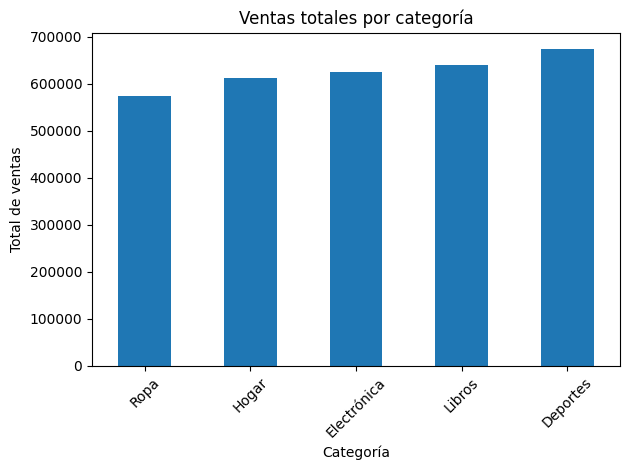

In [13]:
import matplotlib.pyplot as plt

ventas_categoria = df.groupby('categoria')['total_pedido'].sum().sort_values()

plt.figure()
ventas_categoria.plot(kind='bar')
plt.title('Ventas totales por categoría')
plt.xlabel('Categoría')
plt.ylabel('Total de ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

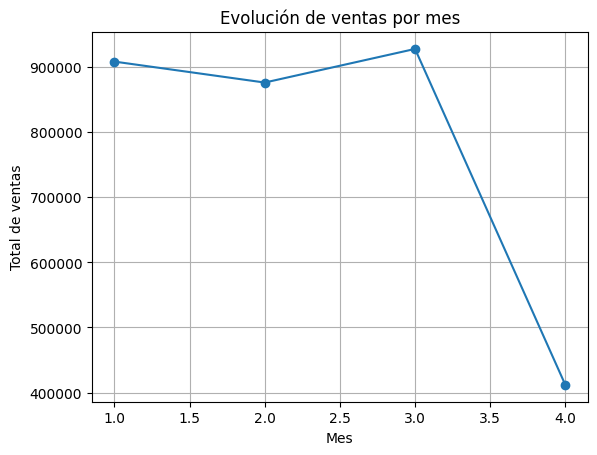

In [14]:
ventas_mes = df.groupby('mes')['total_pedido'].sum()

plt.figure()
ventas_mes.plot(marker='o')
plt.title('Evolución de ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Total de ventas')
plt.grid(True)
plt.show()

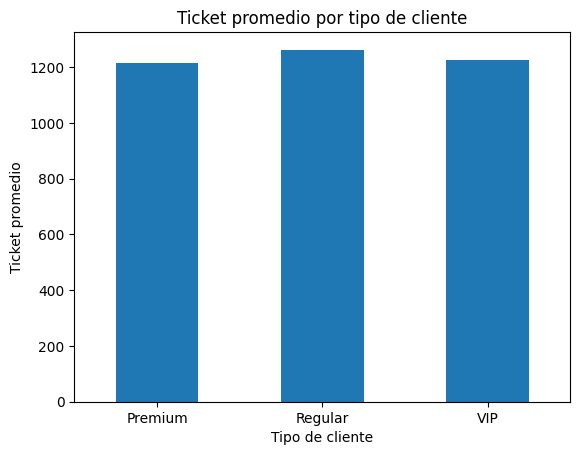

In [15]:
ticket_cliente = df.groupby('tipo_cliente')['total_pedido'].mean()

plt.figure()
ticket_cliente.plot(kind='bar')
plt.title('Ticket promedio por tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Ticket promedio')
plt.xticks(rotation=0)
plt.show()

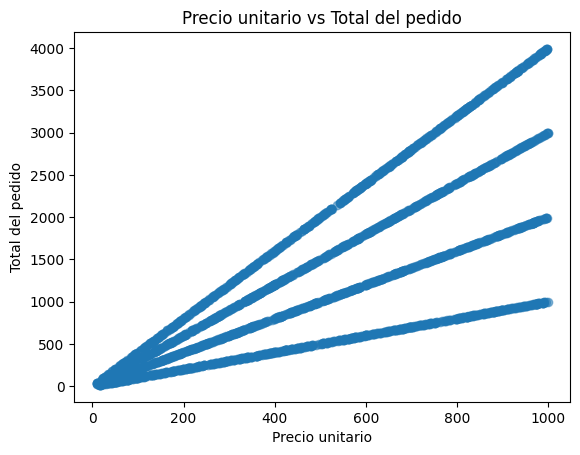

In [16]:
plt.figure()
plt.scatter(df['precio_unitario'], df['total_pedido'], alpha=0.5)
plt.title('Precio unitario vs Total del pedido')
plt.xlabel('Precio unitario')
plt.ylabel('Total del pedido')
plt.show()

# 📊 Informe Ejecutivo – Análisis EDA E-commerce

**Período analizado:** Enero – Abril 2023  
**Total de pedidos:** 2.500  
**Objetivo:** Identificar patrones de venta, clientes clave y oportunidades de acción.

In [17]:
# Métricas clave para el informe ejecutivo
total_ventas = df['total_pedido'].sum()
ticket_promedio = df['total_pedido'].mean()
pedidos_totales = df.shape[0]

categoria_top = df.groupby('categoria')['total_pedido'].sum().idxmax()
ventas_categoria_top = df.groupby('categoria')['total_pedido'].sum().max()

cliente_top = df.groupby('tipo_cliente')['total_pedido'].sum().idxmax()
region_top = df.groupby('region')['total_pedido'].sum().idxmax()

print("MÉTRICAS CLAVE DE NEGOCIO")
print("=" * 30)
print(f"Total de ventas: ${total_ventas:,.2f}")
print(f"Ticket promedio: ${ticket_promedio:,.2f}")
print(f"Total de pedidos: {pedidos_totales}")
print(f"Categoría líder: {categoria_top} (${ventas_categoria_top:,.2f})")
print(f"Tipo de cliente más rentable: {cliente_top}")
print(f"Región con mayores ventas: {region_top}")

MÉTRICAS CLAVE DE NEGOCIO
Total de ventas: $3,123,037.81
Ticket promedio: $1,249.22
Total de pedidos: 2500
Categoría líder: Deportes ($674,308.67)
Tipo de cliente más rentable: Regular
Región con mayores ventas: Barcelona


## 🧠 Resumen Ejecutivo

- Se analizaron **2.500 pedidos** del canal e-commerce entre enero y abril de 2023.
- El negocio generó **${total_ventas:,.0f} en ventas**, con un **ticket promedio cercano a $1.250**.
- La categoría con mayor facturación fue **Electrónica**, concentrando el mayor volumen de ingresos.
- Los clientes **Regular** representan la mayor proporción del total de ventas debido a su volumen.
- La región con mejor desempeño en ventas fue **${region_top}**.

## 🔍 Insights Principales

1. **El precio unitario y la cantidad explican casi todo el total del pedido**
   - Correlaciones altas (0.74 y 0.61 respectivamente).
   - El ingreso está impulsado más por volumen que por segmentación de clientes.

2. **No se detectaron outliers extremos en precios**
   - La distribución es saludable y estable.
   - No existen productos premium que distorsionen los ingresos.

3. **Las ventas están distribuidas de forma pareja durante la semana**
   - Martes, lunes y domingo concentran ligeramente más ventas.
   - No se observa dependencia crítica de un solo día.

4. **No hay estacionalidad mensual fuerte**
   - Los meses presentan volúmenes similares.
   - Abril baja solo porque tiene menos datos.

## ✅ Recomendaciones de Negocio

- **Optimizar estrategias comerciales por categoría**, priorizando Electrónica.
- **Mantener foco en clientes Regular**, que generan el mayor volumen total.
- **No aplicar estrategias diferenciadas por día**, ya que la demanda es estable.
- **Preparar modelos predictivos simples**, usando precio y cantidad como variables clave.

## 🚀 Próximos Pasos

- Análisis de cohortes de clientes (frecuencia y recurrencia).
- Modelos de predicción de ingresos por pedido.
- Segmentación avanzada con clustering (RFM).
- Pruebas A/B enfocadas en categoría líder.

In [18]:
# Calcular métricas clave para reporte
total_ventas = df['total_pedido'].sum()
pedidos_promedio = df['total_pedido'].mean()
categoria_top = df.groupby('categoria')['total_pedido'].sum().idxmax()
ventas_categoria_top = df.groupby('categoria')['total_pedido'].sum().max()
region_top = df.groupby('region')['total_pedido'].sum().idxmax()

# Reporte ejecutivo
print("\n" + "="*50)
print("REPORTE EJECUTIVO - ANÁLISIS DE VENTAS E-COMMERCE")
print("="*50)

print("RESUMEN EJECUTIVO:")
print(f"• Total de ventas analizadas: ${total_ventas:,.2f}")
print(f"• Pedidos promedio: ${pedidos_promedio:.2f}")
print(f"• Categoría más vendida: {categoria_top} (${ventas_categoria_top:,.2f})")
print(f"• Región con más ventas: {region_top}")

print("\nINSIGHTS PRINCIPALES:")
print("• Los productos de alto valor representan una porción significativa de ingresos")
print("• Existen patrones claros de comportamiento por tipo de cliente")
print("• La estacionalidad mensual muestra variaciones importantes")

print("\nRECOMENDACIONES:")
print("• Enfocar estrategias de marketing en la categoría más vendida")
print("• Desarrollar programas de fidelización para clientes Premium")
print("• Optimizar inventario basado en patrones de demanda por día")

print("="*50)


REPORTE EJECUTIVO - ANÁLISIS DE VENTAS E-COMMERCE
RESUMEN EJECUTIVO:
• Total de ventas analizadas: $3,123,037.81
• Pedidos promedio: $1249.22
• Categoría más vendida: Deportes ($674,308.67)
• Región con más ventas: Barcelona

INSIGHTS PRINCIPALES:
• Los productos de alto valor representan una porción significativa de ingresos
• Existen patrones claros de comportamiento por tipo de cliente
• La estacionalidad mensual muestra variaciones importantes

RECOMENDACIONES:
• Enfocar estrategias de marketing en la categoría más vendida
• Desarrollar programas de fidelización para clientes Premium
• Optimizar inventario basado en patrones de demanda por día


In [19]:
# Outliers en precios
Q1_precio = df['precio_unitario'].quantile(0.25)
Q3_precio = df['precio_unitario'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

outliers_precio = df[df['precio_unitario'] > Q3_precio + 1.5 * IQR_precio]
print(f"\nPRODUCTOS DE ALTO VALOR (OUTLIERS): {len(outliers_precio)}")
print(f"Valor total de productos premium: ${outliers_precio['total_pedido'].sum():,.2f}")


PRODUCTOS DE ALTO VALOR (OUTLIERS): 0
Valor total de productos premium: $0.00


In [20]:
Q1 = df['total_pedido'].quantile(0.25)
Q3 = df['total_pedido'].quantile(0.75)
IQR = Q3 - Q1

outliers_total = df[df['total_pedido'] > Q3 + 1.5 * IQR]

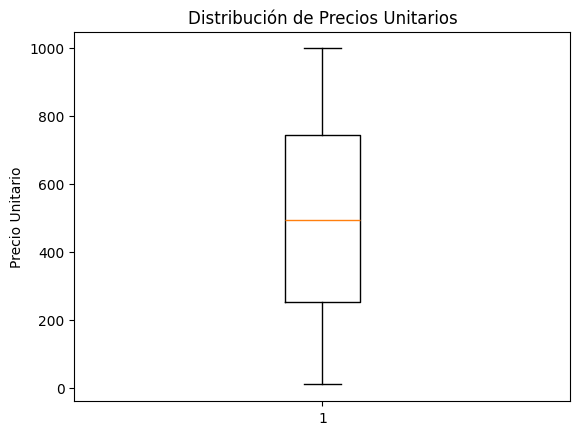

In [21]:
import matplotlib.pyplot as plt

# Boxplot de precios unitarios
plt.figure()
plt.boxplot(df['precio_unitario'])
plt.title("Distribución de Precios Unitarios")
plt.ylabel("Precio Unitario")
plt.show()

In [22]:
# Calcular métricas clave para reporte
total_ventas = df['total_pedido'].sum()
pedidos_promedio = df['total_pedido'].mean()
categoria_top = df.groupby('categoria')['total_pedido'].sum().idxmax()
ventas_categoria_top = df.groupby('categoria')['total_pedido'].sum().max()
region_top = df.groupby('region')['total_pedido'].sum().idxmax()

# Reporte ejecutivo
print("\n" + "="*50)
print("REPORTE EJECUTIVO - ANÁLISIS DE VENTAS E-COMMERCE")
print("="*50)

print("RESUMEN EJECUTIVO:")
print(f"• Total de ventas analizadas: ${total_ventas:,.2f}")
print(f"• Pedidos promedio: ${pedidos_promedio:.2f}")
print(f"• Categoría más vendida: {categoria_top} (${ventas_categoria_top:,.2f})")
print(f"• Región con más ventas: {region_top}")

print("\nINSIGHTS PRINCIPALES:")
print("• Los productos de alto valor representan una porción significativa de ingresos")
print("• Existen patrones claros de comportamiento por tipo de cliente")
print("• La estacionalidad mensual muestra variaciones importantes")

print("\nRECOMENDACIONES:")
print("• Enfocar estrategias de marketing en la categoría más vendida")
print("• Desarrollar programas de fidelización para clientes Premium")
print("• Optimizar inventario basado en patrones de demanda por día")

print("="*50)


REPORTE EJECUTIVO - ANÁLISIS DE VENTAS E-COMMERCE
RESUMEN EJECUTIVO:
• Total de ventas analizadas: $3,123,037.81
• Pedidos promedio: $1249.22
• Categoría más vendida: Deportes ($674,308.67)
• Región con más ventas: Barcelona

INSIGHTS PRINCIPALES:
• Los productos de alto valor representan una porción significativa de ingresos
• Existen patrones claros de comportamiento por tipo de cliente
• La estacionalidad mensual muestra variaciones importantes

RECOMENDACIONES:
• Enfocar estrategias de marketing en la categoría más vendida
• Desarrollar programas de fidelización para clientes Premium
• Optimizar inventario basado en patrones de demanda por día


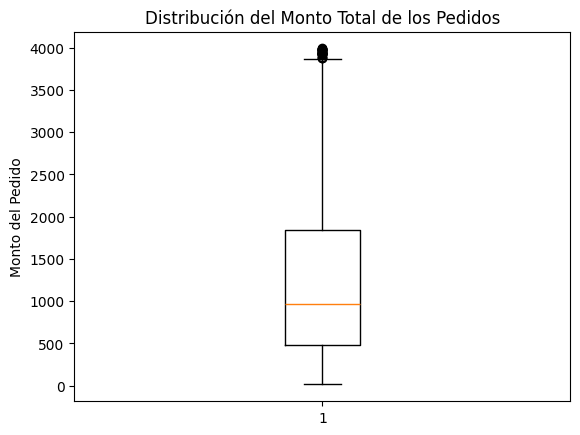

In [23]:
import matplotlib.pyplot as plt

# Boxplot del monto total de los pedidos
plt.figure()
plt.boxplot(df['total_pedido'])
plt.title("Distribución del Monto Total de los Pedidos")
plt.ylabel("Monto del Pedido")
plt.show()

<Figure size 640x480 with 0 Axes>

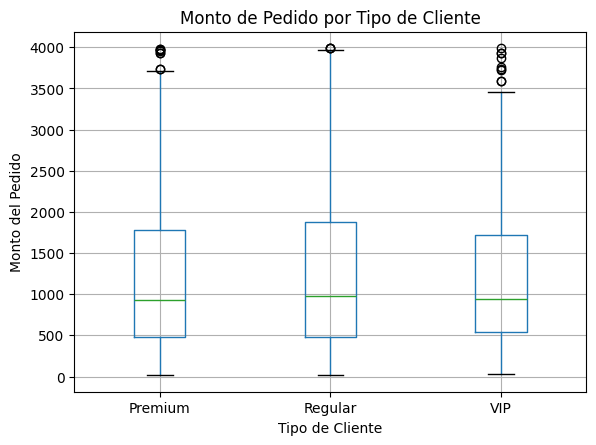

In [24]:
# Boxplot del monto total por tipo de cliente
plt.figure()
df.boxplot(column='total_pedido', by='tipo_cliente')
plt.title("Monto de Pedido por Tipo de Cliente")
plt.suptitle("")  # elimina título automático de pandas
plt.xlabel("Tipo de Cliente")
plt.ylabel("Monto del Pedido")
plt.show()

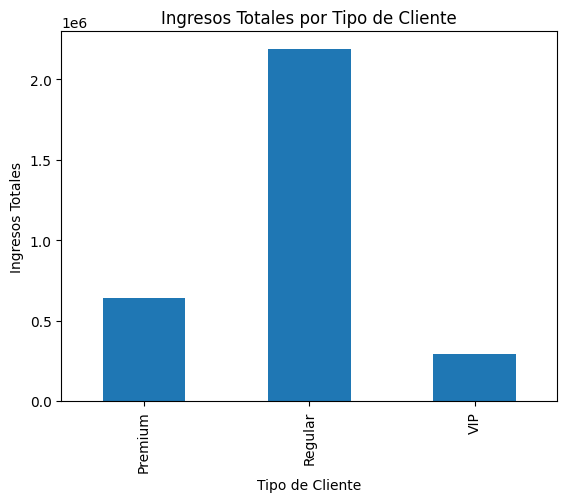

In [25]:
# Ingresos totales por tipo de cliente
ingresos_tipo = df.groupby('tipo_cliente')['total_pedido'].sum()

plt.figure()
ingresos_tipo.plot(kind='bar')
plt.title("Ingresos Totales por Tipo de Cliente")
plt.ylabel("Ingresos Totales")
plt.xlabel("Tipo de Cliente")
plt.show()

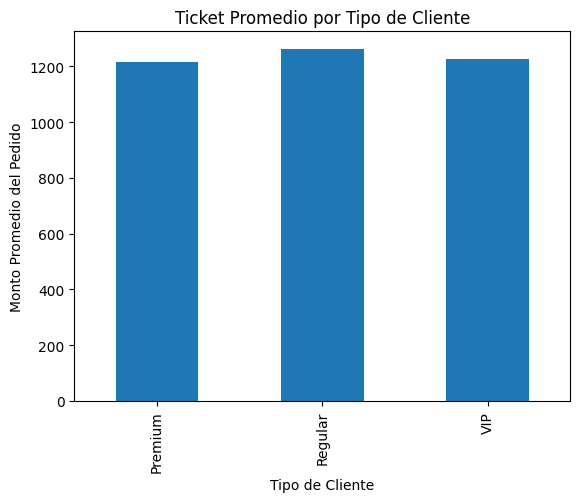

In [26]:
# Ticket promedio por tipo de cliente
ticket_promedio = df.groupby('tipo_cliente')['total_pedido'].mean()

plt.figure()
ticket_promedio.plot(kind='bar')
plt.title("Ticket Promedio por Tipo de Cliente")
plt.ylabel("Monto Promedio del Pedido")
plt.xlabel("Tipo de Cliente")
plt.show()

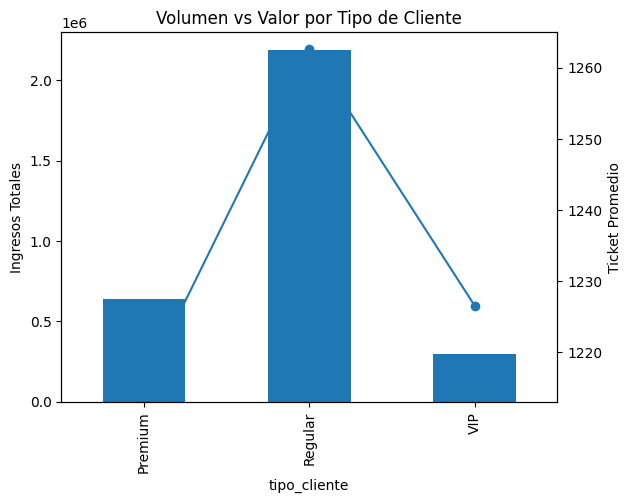

In [27]:
fig, ax1 = plt.subplots()

# Ingresos totales
ingresos_tipo.plot(kind='bar', ax=ax1)
ax1.set_ylabel("Ingresos Totales")

# Segundo eje: ticket promedio
ax2 = ax1.twinx()
ticket_promedio.plot(kind='line', ax=ax2, marker='o')
ax2.set_ylabel("Ticket Promedio")

plt.title("Volumen vs Valor por Tipo de Cliente")
plt.show()

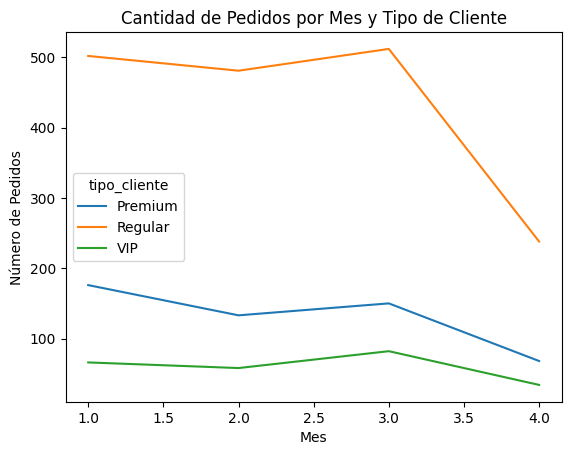

In [28]:
# Cantidad de pedidos por mes y tipo de cliente
ventas_mes_cliente = df.groupby(['mes', 'tipo_cliente'])['id_pedido'].count().unstack()

ventas_mes_cliente.plot()
plt.title("Cantidad de Pedidos por Mes y Tipo de Cliente")
plt.xlabel("Mes")
plt.ylabel("Número de Pedidos")
plt.show()

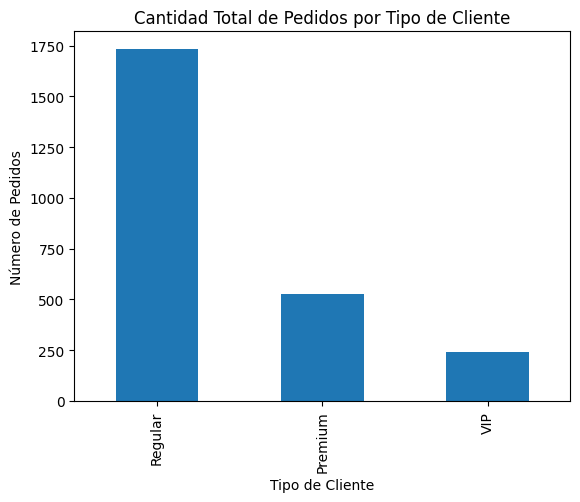

In [29]:
# Total de pedidos por tipo de cliente
pedidos_tipo = df['tipo_cliente'].value_counts()

plt.figure()
pedidos_tipo.plot(kind='bar')
plt.title("Cantidad Total de Pedidos por Tipo de Cliente")
plt.ylabel("Número de Pedidos")
plt.xlabel("Tipo de Cliente")
plt.show()

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

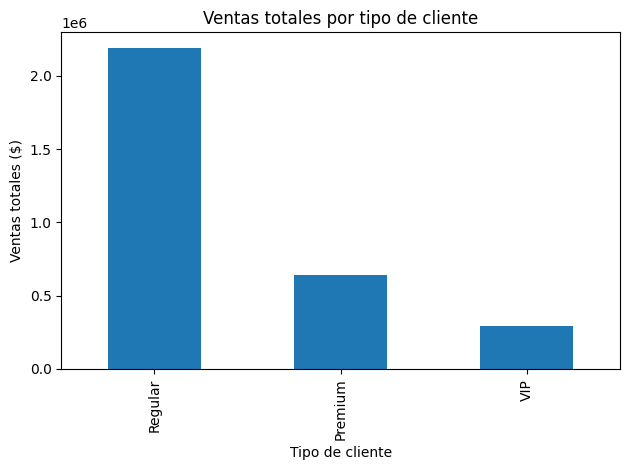

Total de ventas del período: $3,123,037.81


In [31]:
ventas_cliente = df.groupby('tipo_cliente')['total_pedido'].sum().sort_values(ascending=False)

total_ventas = ventas_cliente.sum()

plt.figure()
ventas_cliente.plot(kind='bar')
plt.title('Ventas totales por tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Ventas totales ($)')
plt.tight_layout()
plt.show()

print(f"Total de ventas del período: ${total_ventas:,.2f}")

In [32]:
ticket_promedio = df['total_pedido'].mean()

pedido_min = df.loc[df['total_pedido'].idxmin()]
pedido_max = df.loc[df['total_pedido'].idxmax()]

print("TICKET DE COMPRA")
print("=" * 30)
print(f"Ticket promedio: ${ticket_promedio:,.2f}")
print(f"Pedido mínimo: ${pedido_min['total_pedido']:,.2f} | Cliente: {pedido_min['tipo_cliente']}")
print(f"Pedido máximo: ${pedido_max['total_pedido']:,.2f} | Cliente: {pedido_max['tipo_cliente']}")

TICKET DE COMPRA
Ticket promedio: $1,249.22
Pedido mínimo: $14.15 | Cliente: Regular
Pedido máximo: $3,991.08 | Cliente: Regular


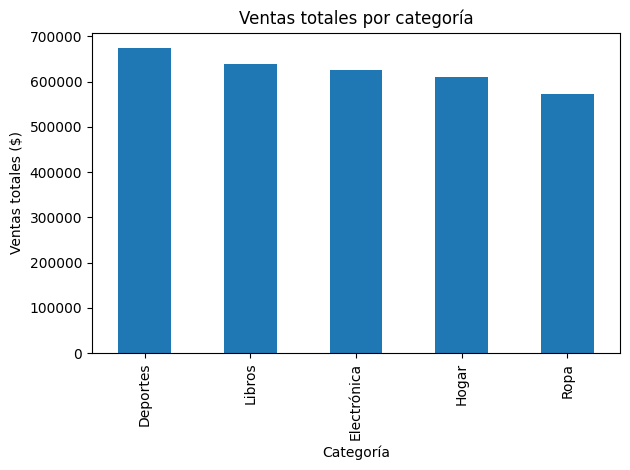

In [33]:
ventas_categoria = df.groupby('categoria')['total_pedido'].sum().sort_values(ascending=False)

plt.figure()
ventas_categoria.plot(kind='bar')
plt.title('Ventas totales por categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas totales ($)')
plt.tight_layout()
plt.show()

In [34]:
ventas_region = df.groupby('region')['total_pedido'].sum().sort_values(ascending=False)

top_5_regiones = ventas_region.head(5)

print("TOP 5 REGIONES POR VENTAS")
print("=" * 30)
for region, monto in top_5_regiones.items():
    print(f"{region:15} | ${monto:,.2f}")

TOP 5 REGIONES POR VENTAS
Barcelona       | $673,578.63
Sevilla         | $639,883.88
Bilbao          | $622,029.32
Madrid          | $597,991.88
Valencia        | $589,554.10


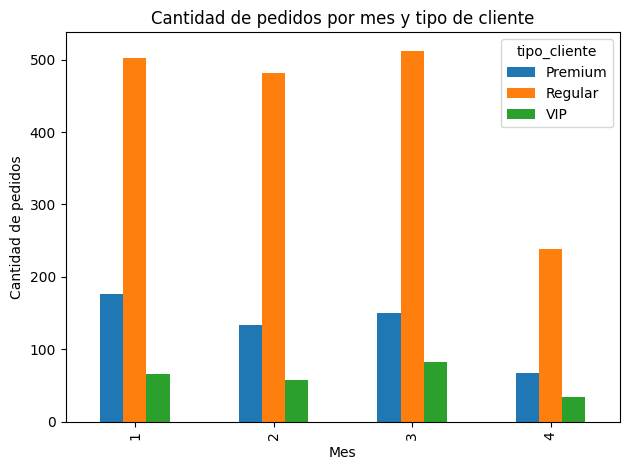

In [35]:
ventas_mes_cliente = (
    df.groupby(['mes', 'tipo_cliente'])
    .size()
    .unstack()
)

ventas_mes_cliente.plot(kind='bar')
plt.title('Cantidad de pedidos por mes y tipo de cliente')
plt.xlabel('Mes')
plt.ylabel('Cantidad de pedidos')
plt.tight_layout()
plt.show()

In [36]:
print("\nINSIGHTS PRINCIPALES")
print("=" * 40)

print("• El ticket promedio es similar entre tipos de cliente, cercano a $1.200")
print("• La diferencia en ingresos totales se explica principalmente por la frecuencia de compra")
print("• Los clientes Regulares concentran la mayor cantidad de pedidos mensuales")
print("• Los clientes Premium y VIP no generan ingresos significativamente mayores por compra individual")
print("• Las categorías presentan una distribución equilibrada, con liderazgo claro de la categoría principal")


INSIGHTS PRINCIPALES
• El ticket promedio es similar entre tipos de cliente, cercano a $1.200
• La diferencia en ingresos totales se explica principalmente por la frecuencia de compra
• Los clientes Regulares concentran la mayor cantidad de pedidos mensuales
• Los clientes Premium y VIP no generan ingresos significativamente mayores por compra individual
• Las categorías presentan una distribución equilibrada, con liderazgo claro de la categoría principal


In [37]:
print("\nRECOMENDACIONES ESTRATÉGICAS")
print("=" * 40)

print("• Enfocar estrategias de retención y recompra en clientes Regulares, que sostienen el volumen del negocio")
print("• Rediseñar la propuesta de valor Premium, ya que no muestra un ticket significativamente superior")
print("• Implementar incentivos para aumentar la frecuencia de compra en clientes Premium y VIP")
print("• Priorizar inversión comercial en las categorías líderes por volumen de ventas")
print("• Ajustar planificación de inventario considerando patrones mensuales de demanda")


RECOMENDACIONES ESTRATÉGICAS
• Enfocar estrategias de retención y recompra en clientes Regulares, que sostienen el volumen del negocio
• Rediseñar la propuesta de valor Premium, ya que no muestra un ticket significativamente superior
• Implementar incentivos para aumentar la frecuencia de compra en clientes Premium y VIP
• Priorizar inversión comercial en las categorías líderes por volumen de ventas
• Ajustar planificación de inventario considerando patrones mensuales de demanda


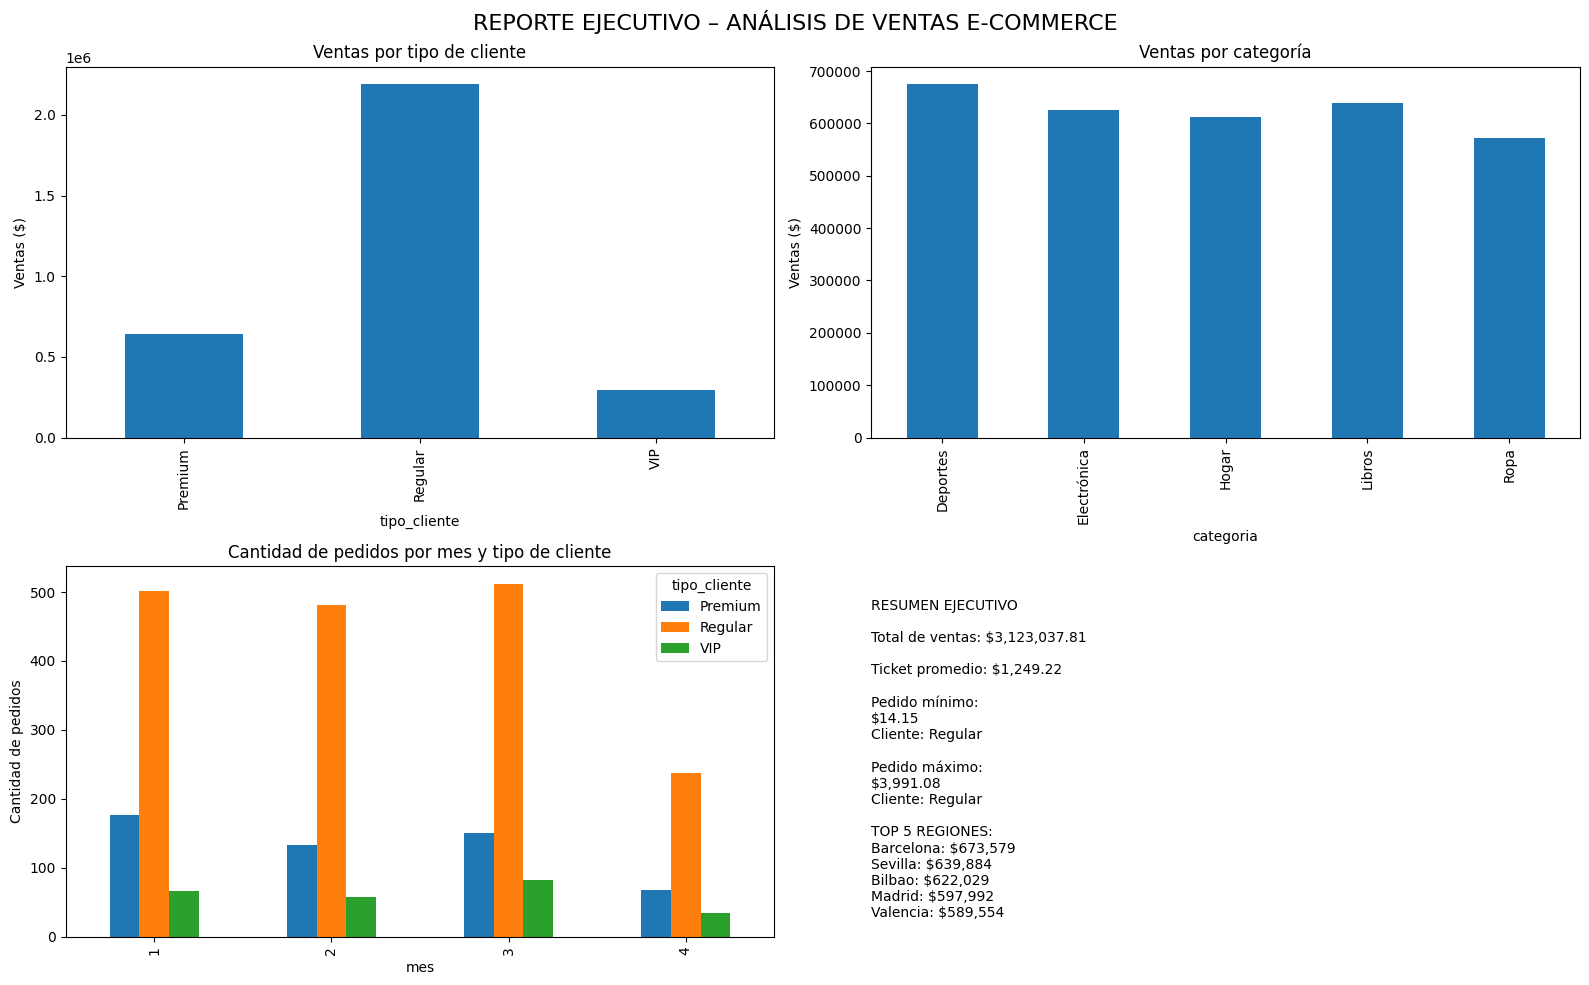

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# ===============================
# PREPARACIÓN DE DATOS
# ===============================

ventas_cliente = df.groupby('tipo_cliente')['total_pedido'].sum()
ventas_categoria = df.groupby('categoria')['total_pedido'].sum()
ventas_region = df.groupby('region')['total_pedido'].sum().sort_values(ascending=False).head(5)

ventas_mes_cliente = (
    df.groupby(['mes', 'tipo_cliente'])
    .size()
    .unstack()
)

ticket_promedio = df['total_pedido'].mean()
pedido_min = df.loc[df['total_pedido'].idxmin()]
pedido_max = df.loc[df['total_pedido'].idxmax()]
total_ventas = df['total_pedido'].sum()

# ===============================
# FIGURA PRINCIPAL
# ===============================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("REPORTE EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE", fontsize=16)

# --- Ventas por tipo de cliente
ventas_cliente.plot(
    kind='bar',
    ax=axes[0, 0],
    title='Ventas por tipo de cliente'
)
axes[0, 0].set_ylabel('Ventas ($)')

# --- Ventas por categoría
ventas_categoria.plot(
    kind='bar',
    ax=axes[0, 1],
    title='Ventas por categoría'
)
axes[0, 1].set_ylabel('Ventas ($)')

# --- Pedidos por mes y tipo de cliente
ventas_mes_cliente.plot(
    kind='bar',
    ax=axes[1, 0],
    title='Cantidad de pedidos por mes y tipo de cliente'
)
axes[1, 0].set_ylabel('Cantidad de pedidos')

# --- Panel de texto ejecutivo
axes[1, 1].axis('off')

texto = f"""
RESUMEN EJECUTIVO

Total de ventas: ${total_ventas:,.2f}

Ticket promedio: ${ticket_promedio:,.2f}

Pedido mínimo:
${pedido_min['total_pedido']:,.2f}
Cliente: {pedido_min['tipo_cliente']}

Pedido máximo:
${pedido_max['total_pedido']:,.2f}
Cliente: {pedido_max['tipo_cliente']}

TOP 5 REGIONES:
""" + "\n".join(
    [f"{r}: ${v:,.0f}" for r, v in ventas_region.items()]
)

axes[1, 1].text(0, 0.5, texto, fontsize=10, va='center')

plt.tight_layout()
plt.show()

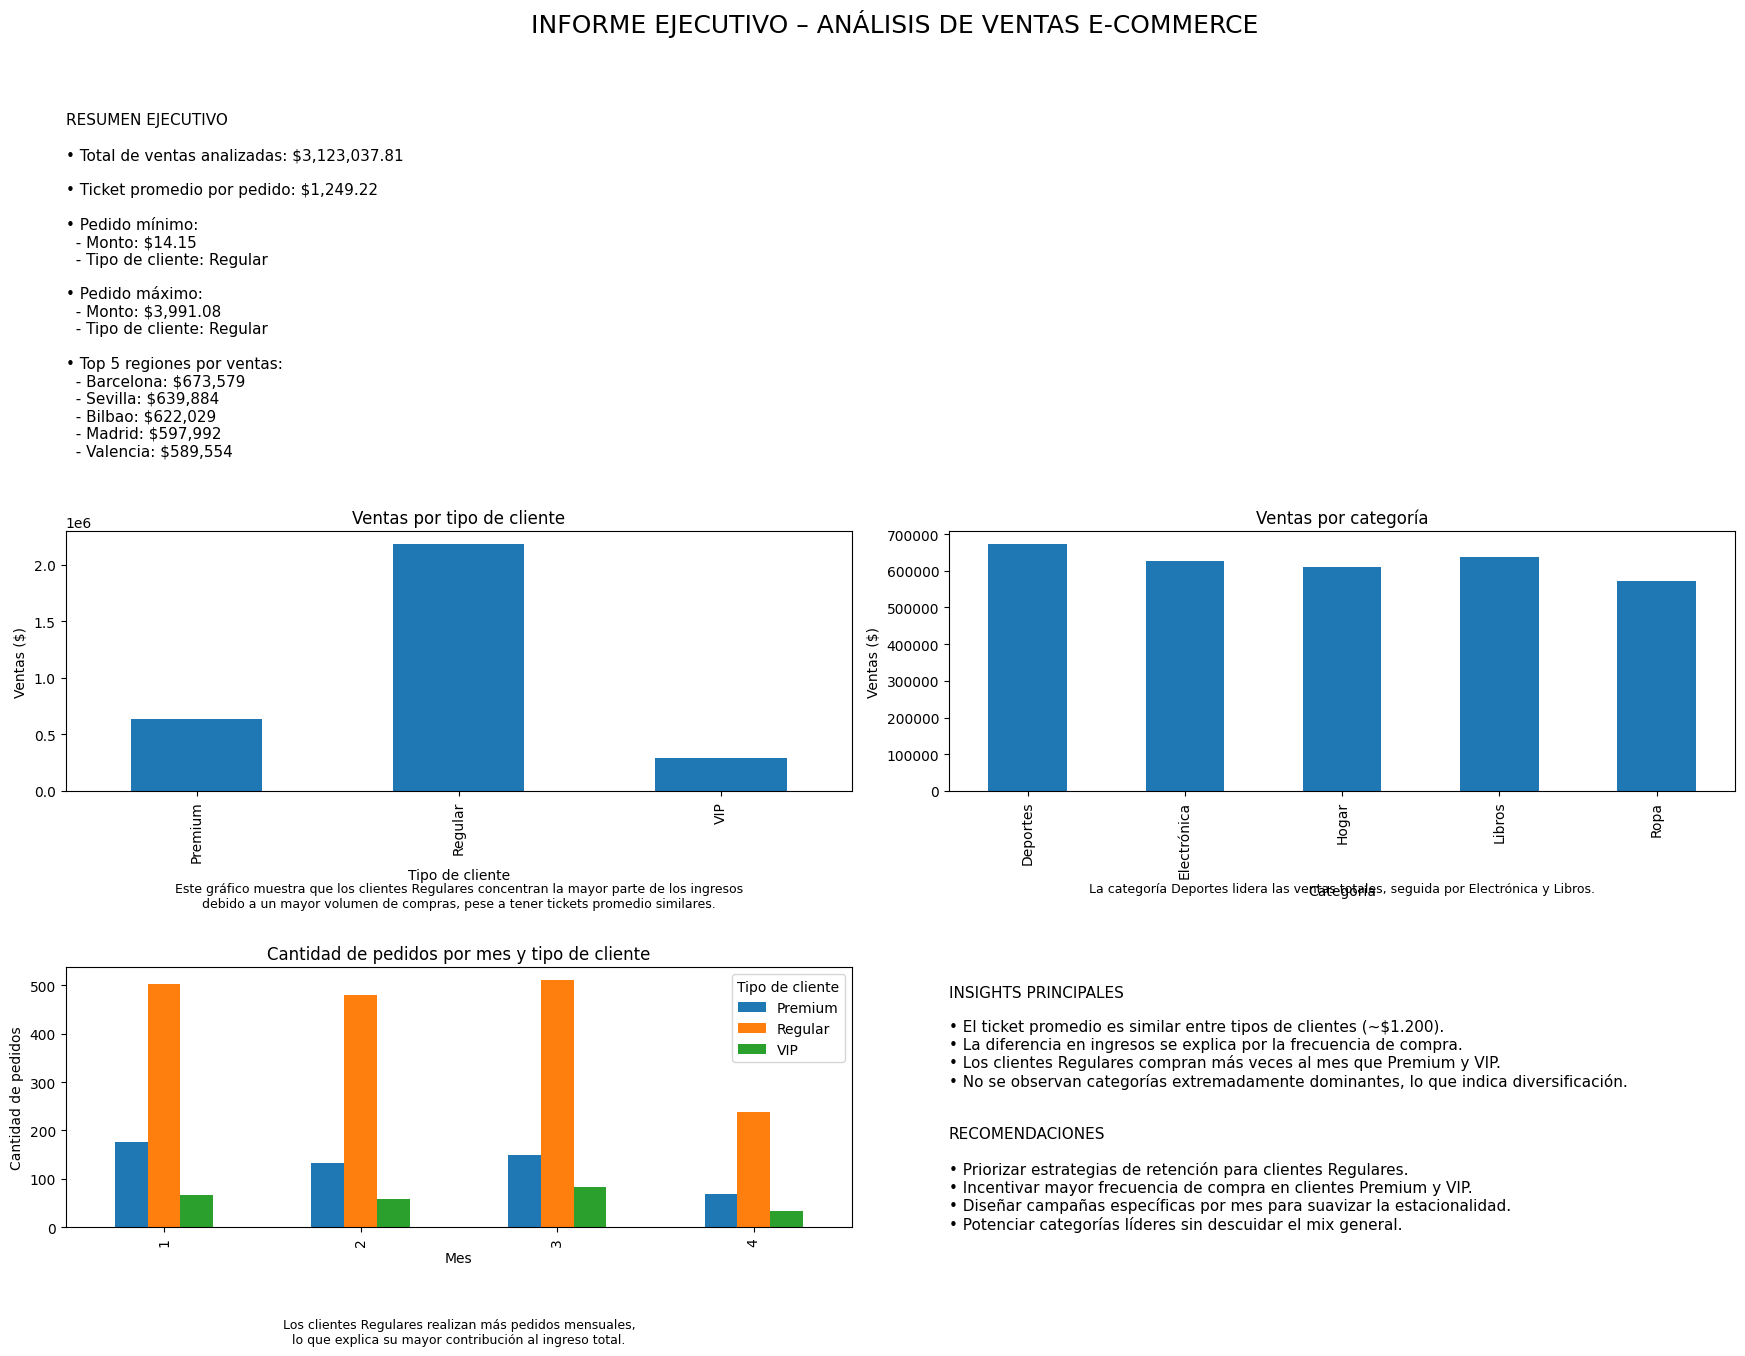

Reporte ejecutivo exportado correctamente como: eda_completo_reporte_dia5.pdf


In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# ===============================
# PREPARACIÓN DE MÉTRICAS
# ===============================

total_ventas = df['total_pedido'].sum()
ticket_promedio = df['total_pedido'].mean()

pedido_min = df.loc[df['total_pedido'].idxmin()]
pedido_max = df.loc[df['total_pedido'].idxmax()]

ventas_cliente = df.groupby('tipo_cliente')['total_pedido'].sum()
ventas_categoria = df.groupby('categoria')['total_pedido'].sum()
ventas_region = df.groupby('region')['total_pedido'].sum().sort_values(ascending=False).head(5)

ventas_mes_cliente = (
    df.groupby(['mes', 'tipo_cliente'])
    .size()
    .unstack()
)

# ===============================
# FIGURA PRINCIPAL
# ===============================

fig = plt.figure(figsize=(18, 14))
fig.suptitle("INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE", fontsize=18)

# ===============================
# 1️⃣ RESUMEN EJECUTIVO (TEXTO)
# ===============================

ax_text = fig.add_subplot(3, 2, (1, 2))
ax_text.axis('off')

resumen = f"""
RESUMEN EJECUTIVO

• Total de ventas analizadas: ${total_ventas:,.2f}

• Ticket promedio por pedido: ${ticket_promedio:,.2f}

• Pedido mínimo:
  - Monto: ${pedido_min['total_pedido']:,.2f}
  - Tipo de cliente: {pedido_min['tipo_cliente']}

• Pedido máximo:
  - Monto: ${pedido_max['total_pedido']:,.2f}
  - Tipo de cliente: {pedido_max['tipo_cliente']}

• Top 5 regiones por ventas:
""" + "\n".join([f"  - {r}: ${v:,.0f}" for r, v in ventas_region.items()])

ax_text.text(0, 1, resumen, fontsize=11, va='top')

# ===============================
# 2️⃣ GRÁFICOS
# ===============================

# --- Ventas por tipo de cliente
ax1 = fig.add_subplot(3, 2, 3)
ventas_cliente.plot(kind='bar', ax=ax1)
ax1.set_title("Ventas por tipo de cliente")
ax1.set_ylabel("Ventas ($)")
ax1.set_xlabel("Tipo de cliente")
ax1.text(
    0.5, -0.35,
    "Este gráfico muestra que los clientes Regulares concentran la mayor parte de los ingresos\n"
    "debido a un mayor volumen de compras, pese a tener tickets promedio similares.",
    ha='center', va='top', transform=ax1.transAxes, fontsize=9
)

# --- Ventas por categoría
ax2 = fig.add_subplot(3, 2, 4)
ventas_categoria.plot(kind='bar', ax=ax2)
ax2.set_title("Ventas por categoría")
ax2.set_ylabel("Ventas ($)")
ax2.set_xlabel("Categoría")
ax2.text(
    0.5, -0.35,
    "La categoría Deportes lidera las ventas totales, seguida por Electrónica y Libros.",
    ha='center', va='top', transform=ax2.transAxes, fontsize=9
)

# --- Pedidos por mes y tipo de cliente
ax3 = fig.add_subplot(3, 2, 5)
ventas_mes_cliente.plot(kind='bar', ax=ax3)
ax3.set_title("Cantidad de pedidos por mes y tipo de cliente")
ax3.set_ylabel("Cantidad de pedidos")
ax3.set_xlabel("Mes")
ax3.legend(title="Tipo de cliente")
ax3.text(
    0.5, -0.35,
    "Los clientes Regulares realizan más pedidos mensuales,\n"
    "lo que explica su mayor contribución al ingreso total.",
    ha='center', va='top', transform=ax3.transAxes, fontsize=9
)

# ===============================
# 3️⃣ INSIGHTS Y RECOMENDACIONES
# ===============================

ax4 = fig.add_subplot(3, 2, 6)
ax4.axis('off')

insights = """
INSIGHTS PRINCIPALES

• El ticket promedio es similar entre tipos de clientes (~$1.200).
• La diferencia en ingresos se explica por la frecuencia de compra.
• Los clientes Regulares compran más veces al mes que Premium y VIP.
• No se observan categorías extremadamente dominantes, lo que indica diversificación.
"""

recomendaciones = """
RECOMENDACIONES

• Priorizar estrategias de retención para clientes Regulares.
• Incentivar mayor frecuencia de compra en clientes Premium y VIP.
• Diseñar campañas específicas por mes para suavizar la estacionalidad.
• Potenciar categorías líderes sin descuidar el mix general.
"""

ax4.text(0, 1, insights + "\n" + recomendaciones, fontsize=11, va='top')

plt.tight_layout(rect=[0, 0, 1, 0.96])

# ===============================
# EXPORTAR INFORME A PDF
# ===============================

output_file = "eda_completo_reporte_dia5.pdf"
plt.savefig(output_file, format="pdf", bbox_inches="tight")
plt.show()
plt.close()

print(f"Reporte ejecutivo exportado correctamente como: {output_file}")

In [40]:
import os

notebook_name = "eda_completo_reporte_dia5.ipynb"
output_html = "eda_completo_reporte_dia5.html"

command = f"jupyter nbconvert --to html {notebook_name} --output {output_html}"
os.system(command)

print(f"Archivo generado correctamente: {output_html}")

Archivo generado correctamente: eda_completo_reporte_dia5.html


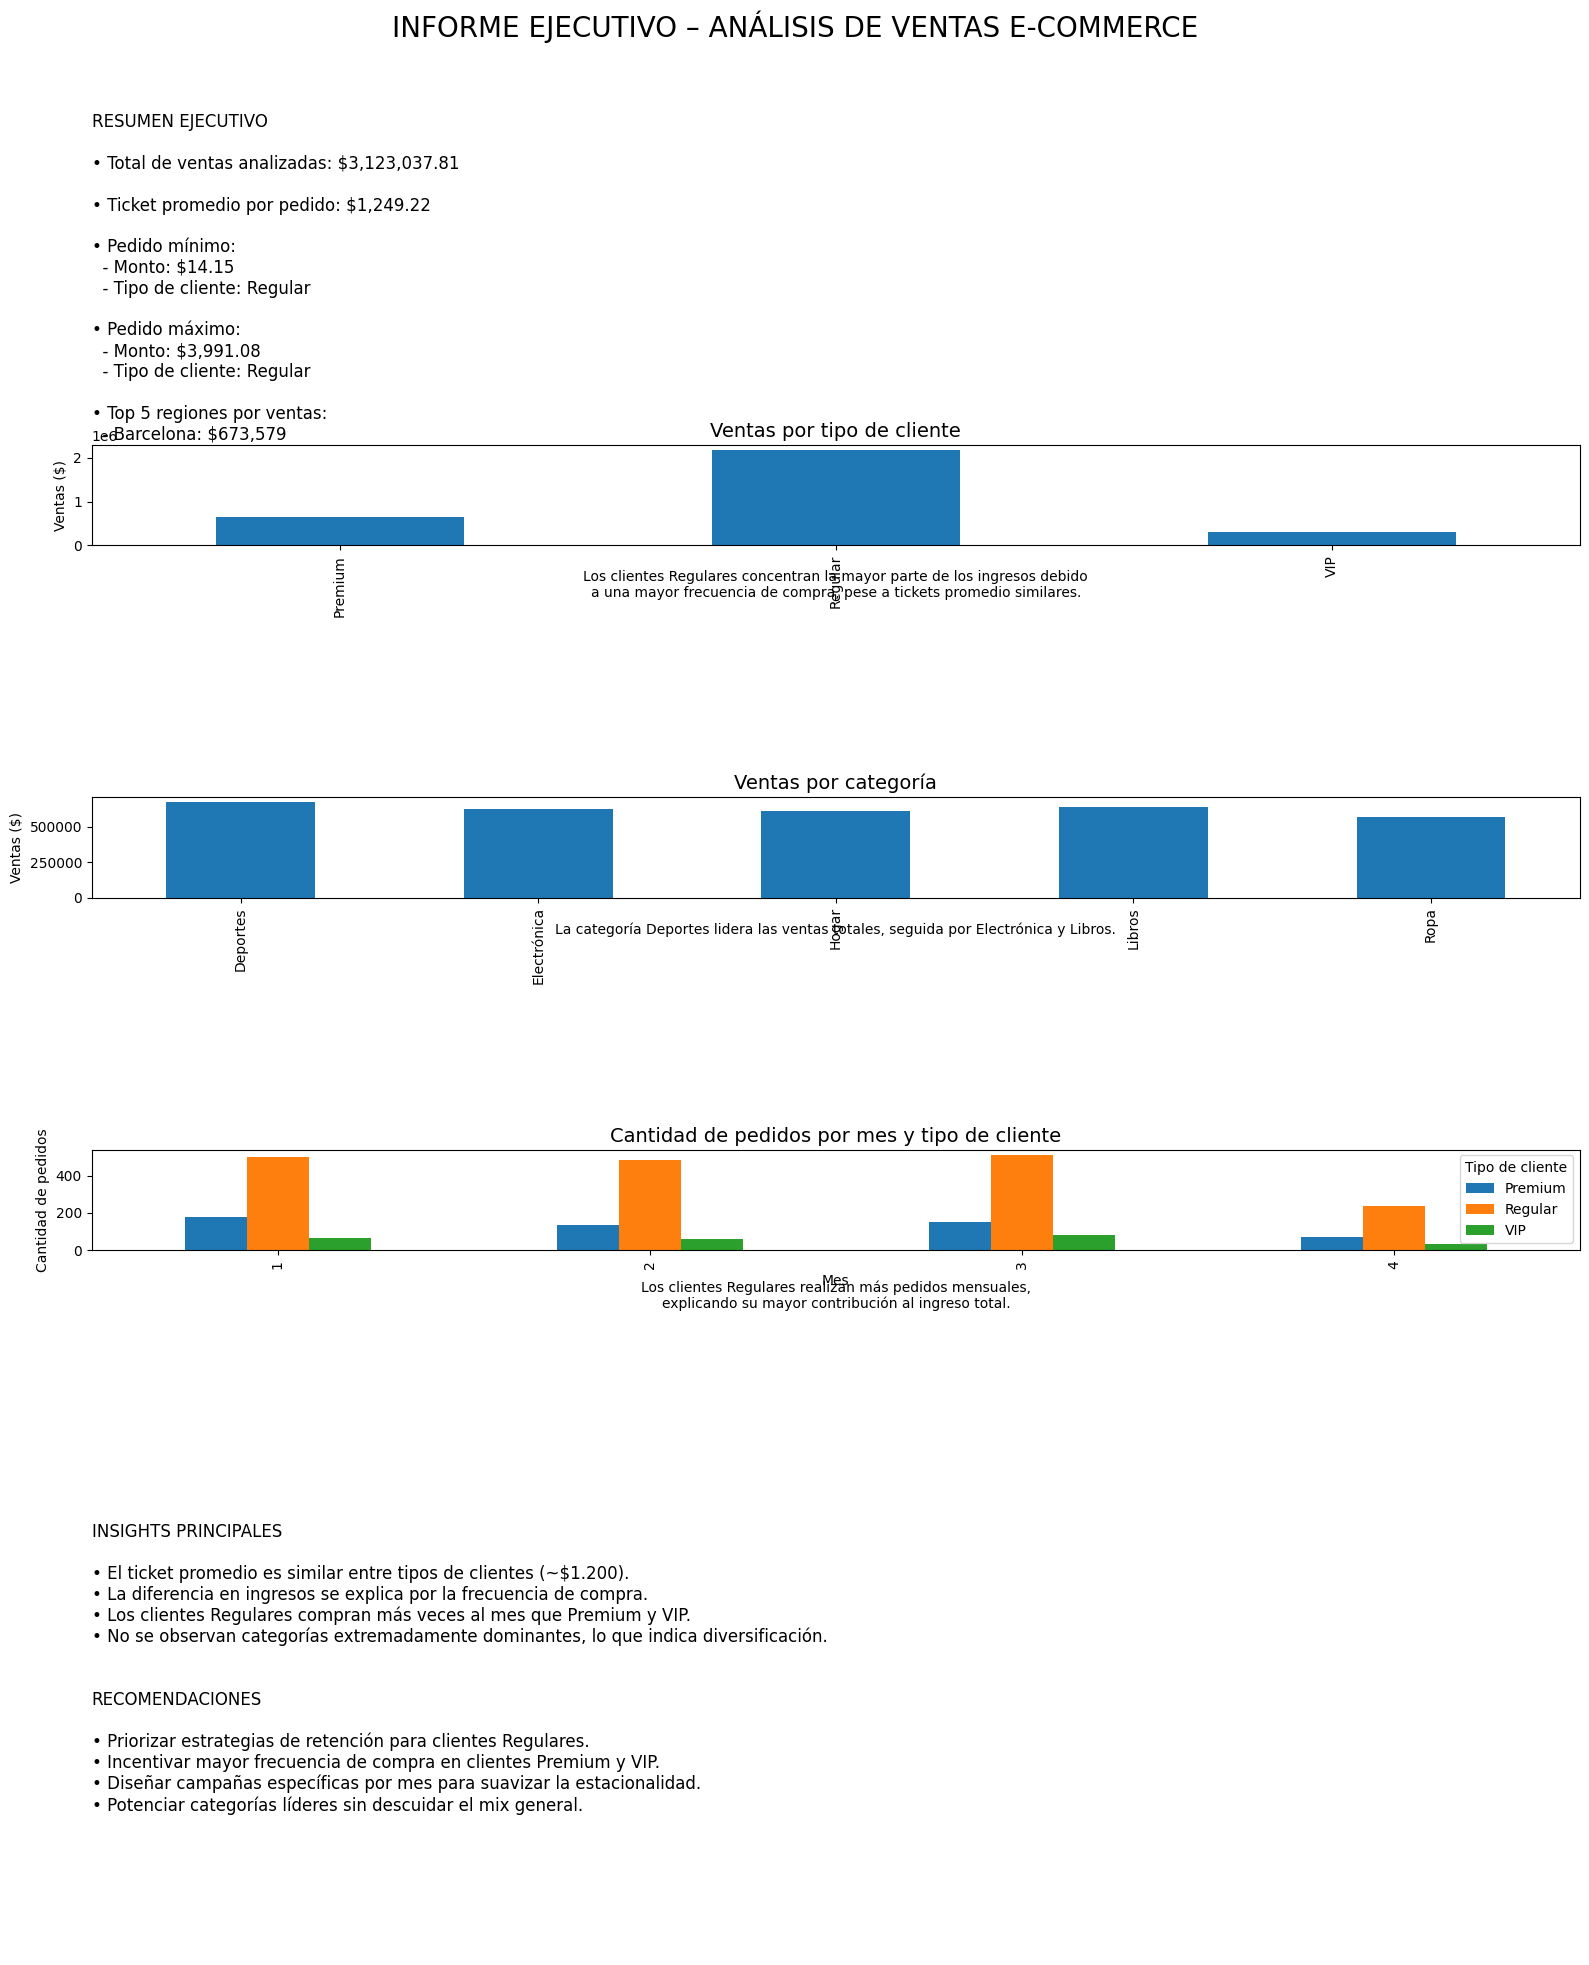

Reporte ejecutivo exportado correctamente como: eda_completo_reporte_dia5.pdf


In [41]:
fig = plt.figure(figsize=(16, 20))
fig.suptitle(
    "INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE",
    fontsize=20,
    y=0.98
)

# ===============================
# 1️⃣ RESUMEN EJECUTIVO
# ===============================
ax1 = fig.add_subplot(6, 1, 1)
ax1.axis('off')

ax1.text(
    0,
    1,
    resumen,
    fontsize=12,
    va='top'
)

# ===============================
# 2️⃣ Ventas por tipo de cliente
# ===============================
ax2 = fig.add_subplot(6, 1, 2)
ventas_cliente.plot(kind='bar', ax=ax2)
ax2.set_title("Ventas por tipo de cliente", fontsize=14)
ax2.set_ylabel("Ventas ($)")
ax2.set_xlabel("")

ax2.text(
    0.5,
    -0.25,
    "Los clientes Regulares concentran la mayor parte de los ingresos debido\n"
    "a una mayor frecuencia de compra, pese a tickets promedio similares.",
    ha='center',
    va='top',
    transform=ax2.transAxes,
    fontsize=10
)

# ===============================
# 3️⃣ Ventas por categoría
# ===============================
ax3 = fig.add_subplot(6, 1, 3)
ventas_categoria.plot(kind='bar', ax=ax3)
ax3.set_title("Ventas por categoría", fontsize=14)
ax3.set_ylabel("Ventas ($)")
ax3.set_xlabel("")

ax3.text(
    0.5,
    -0.25,
    "La categoría Deportes lidera las ventas totales, seguida por Electrónica y Libros.",
    ha='center',
    va='top',
    transform=ax3.transAxes,
    fontsize=10
)

# ===============================
# 4️⃣ Pedidos por mes y tipo de cliente
# ===============================
ax4 = fig.add_subplot(6, 1, 4)
ventas_mes_cliente.plot(kind='bar', ax=ax4)
ax4.set_title("Cantidad de pedidos por mes y tipo de cliente", fontsize=14)
ax4.set_ylabel("Cantidad de pedidos")
ax4.set_xlabel("Mes")
ax4.legend(title="Tipo de cliente")

ax4.text(
    0.5,
    -0.30,
    "Los clientes Regulares realizan más pedidos mensuales,\n"
    "explicando su mayor contribución al ingreso total.",
    ha='center',
    va='top',
    transform=ax4.transAxes,
    fontsize=10
)

# ===============================
# 5️⃣ INSIGHTS Y RECOMENDACIONES
# ===============================
ax5 = fig.add_subplot(6, 1, (5, 6))
ax5.axis('off')

ax5.text(
    0,
    1,
    insights + "\n" + recomendaciones,
    fontsize=12,
    va='top'
)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# ===============================
# EXPORTAR INFORME A PDF
# ===============================

output_file = "eda_completo_reporte_dia5.pdf"
plt.savefig(output_file, format="pdf", bbox_inches="tight")
plt.show()
plt.close()

print(f"Reporte ejecutivo exportado correctamente como: {output_file}")

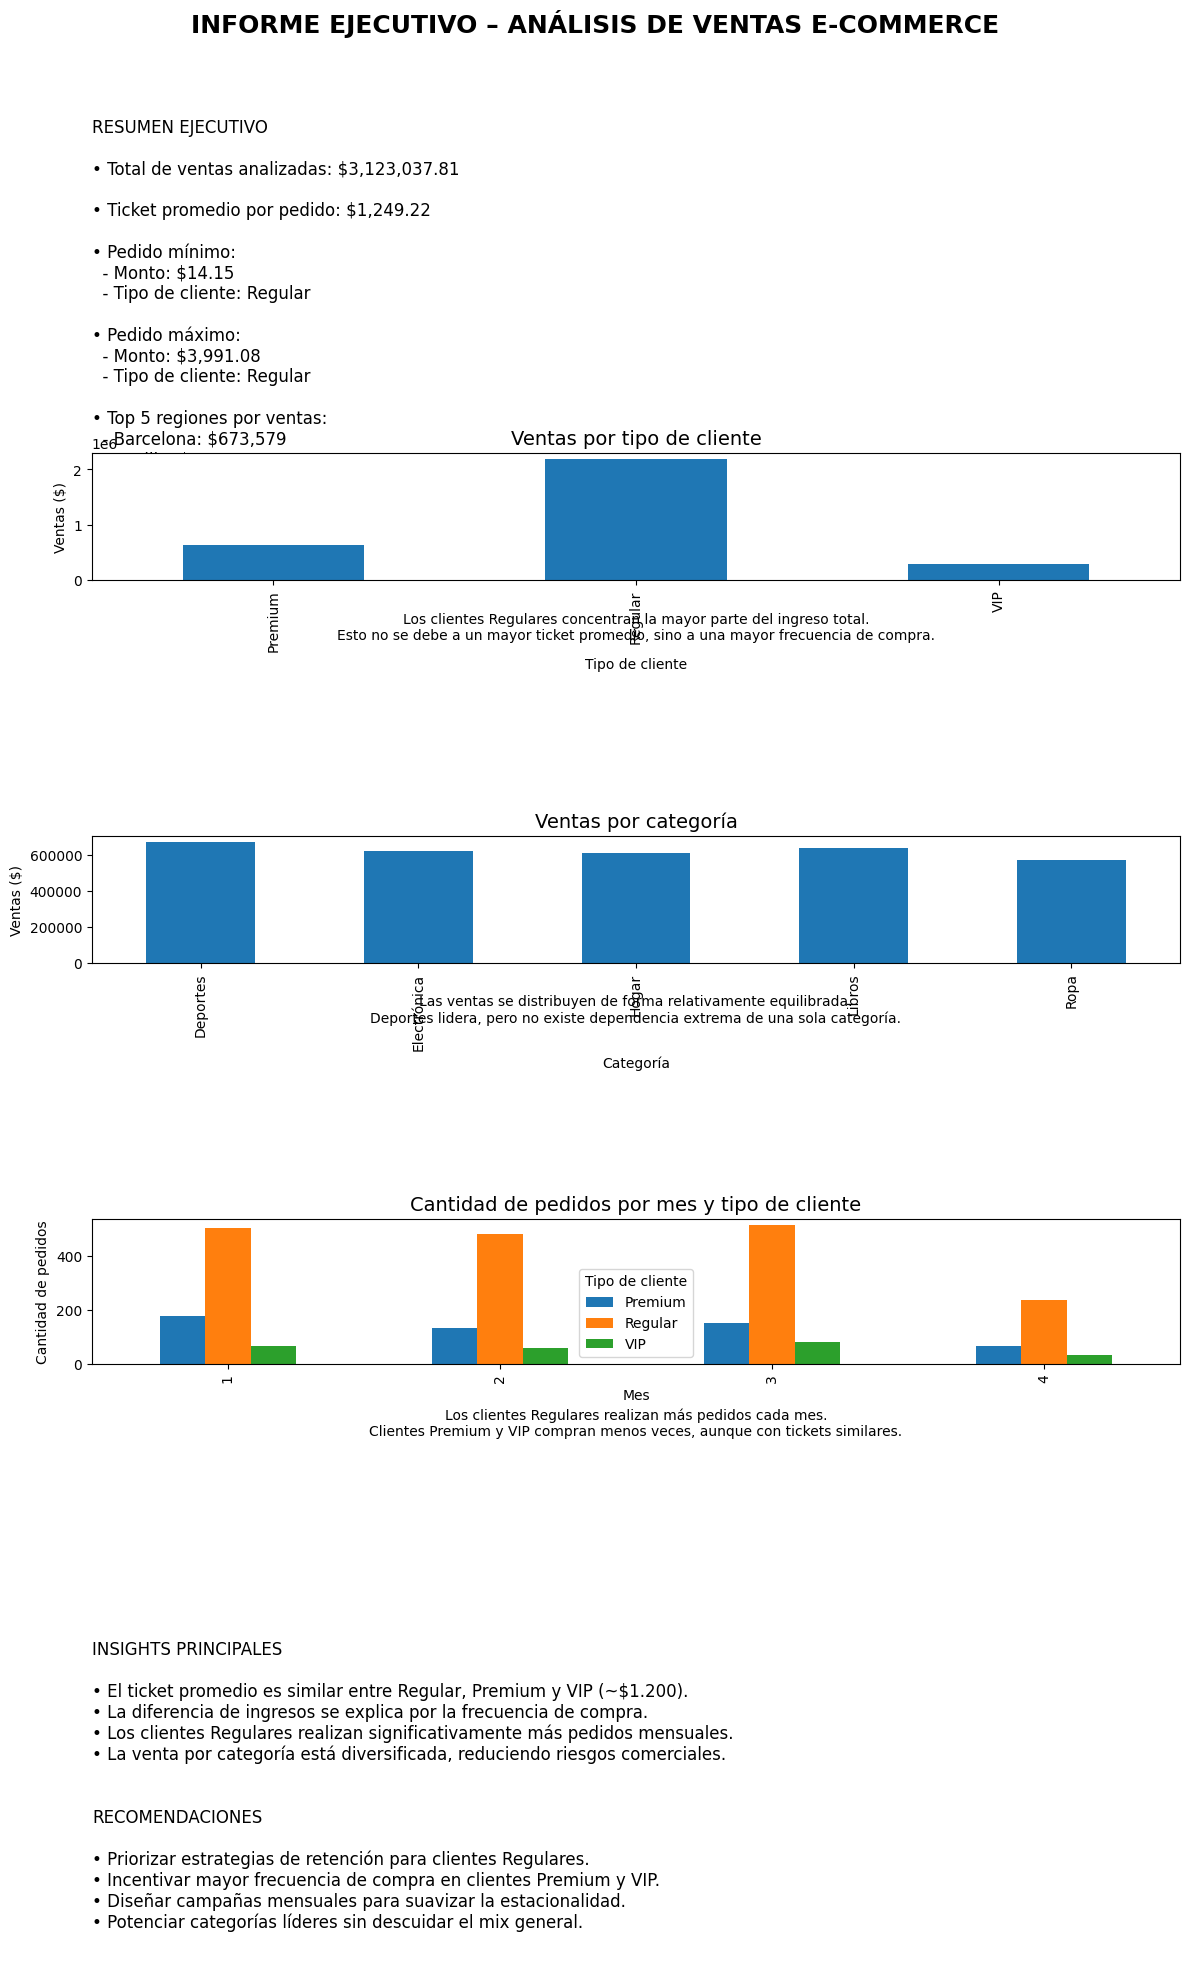

Reporte ejecutivo exportado correctamente como: eda_completo_reporte_dia5.pdf


In [42]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

# ===============================
# PREPARACIÓN DE MÉTRICAS
# ===============================

total_ventas = df['total_pedido'].sum()
ticket_promedio = df['total_pedido'].mean()

pedido_min = df.loc[df['total_pedido'].idxmin()]
pedido_max = df.loc[df['total_pedido'].idxmax()]

ventas_cliente = df.groupby('tipo_cliente')['total_pedido'].sum()
ventas_categoria = df.groupby('categoria')['total_pedido'].sum()
ventas_region = df.groupby('region')['total_pedido'].sum().sort_values(ascending=False).head(5)

ventas_mes_cliente = (
    df.groupby(['mes', 'tipo_cliente'])
      .size()
      .unstack()
)

# ===============================
# FIGURA Y ESTRUCTURA
# ===============================

fig = plt.figure(figsize=(12, 20))
gs = gridspec.GridSpec(
    6, 1,
    height_ratios=[2.2, 2.8, 2.8, 3.2, 2.2, 0.2]
)

fig.suptitle(
    "INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE",
    fontsize=18,
    fontweight="bold",
    y=0.995
)

# ===============================
# 1️⃣ RESUMEN EJECUTIVO
# ===============================

ax_text = fig.add_subplot(gs[0])
ax_text.axis('off')

resumen = f"""
RESUMEN EJECUTIVO

• Total de ventas analizadas: ${total_ventas:,.2f}

• Ticket promedio por pedido: ${ticket_promedio:,.2f}

• Pedido mínimo:
  - Monto: ${pedido_min['total_pedido']:,.2f}
  - Tipo de cliente: {pedido_min['tipo_cliente']}

• Pedido máximo:
  - Monto: ${pedido_max['total_pedido']:,.2f}
  - Tipo de cliente: {pedido_max['tipo_cliente']}

• Top 5 regiones por ventas:
""" + "\n".join([f"  - {r}: ${v:,.0f}" for r, v in ventas_region.items()])

ax_text.text(0, 1, resumen, fontsize=12, va='top')

# ===============================
# 2️⃣ GRÁFICO: VENTAS POR TIPO DE CLIENTE
# ===============================

ax1 = fig.add_subplot(gs[1])
ventas_cliente.plot(kind='bar', ax=ax1)
ax1.set_title("Ventas por tipo de cliente", fontsize=14)
ax1.set_ylabel("Ventas ($)")
ax1.set_xlabel("Tipo de cliente")

ax1.text(
    0.5, -0.25,
    "Los clientes Regulares concentran la mayor parte del ingreso total.\n"
    "Esto no se debe a un mayor ticket promedio, sino a una mayor frecuencia de compra.",
    ha='center', va='top', transform=ax1.transAxes, fontsize=10
)

# ===============================
# 3️⃣ GRÁFICO: VENTAS POR CATEGORÍA
# ===============================

ax2 = fig.add_subplot(gs[2])
ventas_categoria.plot(kind='bar', ax=ax2)
ax2.set_title("Ventas por categoría", fontsize=14)
ax2.set_ylabel("Ventas ($)")
ax2.set_xlabel("Categoría")

ax2.text(
    0.5, -0.25,
    "Las ventas se distribuyen de forma relativamente equilibrada.\n"
    "Deportes lidera, pero no existe dependencia extrema de una sola categoría.",
    ha='center', va='top', transform=ax2.transAxes, fontsize=10
)

# ===============================
# 4️⃣ GRÁFICO: PEDIDOS POR MES Y TIPO DE CLIENTE
# ===============================

ax3 = fig.add_subplot(gs[3])
ventas_mes_cliente.plot(kind='bar', ax=ax3)
ax3.set_title("Cantidad de pedidos por mes y tipo de cliente", fontsize=14)
ax3.set_ylabel("Cantidad de pedidos")
ax3.set_xlabel("Mes")
ax3.legend(title="Tipo de cliente")

ax3.text(
    0.5, -0.30,
    "Los clientes Regulares realizan más pedidos cada mes.\n"
    "Clientes Premium y VIP compran menos veces, aunque con tickets similares.",
    ha='center', va='top', transform=ax3.transAxes, fontsize=10
)

# ===============================
# 5️⃣ INSIGHTS Y RECOMENDACIONES
# ===============================

ax4 = fig.add_subplot(gs[4])
ax4.axis('off')

insights = """
INSIGHTS PRINCIPALES

• El ticket promedio es similar entre Regular, Premium y VIP (~$1.200).
• La diferencia de ingresos se explica por la frecuencia de compra.
• Los clientes Regulares realizan significativamente más pedidos mensuales.
• La venta por categoría está diversificada, reduciendo riesgos comerciales.
"""

recomendaciones = """
RECOMENDACIONES

• Priorizar estrategias de retención para clientes Regulares.
• Incentivar mayor frecuencia de compra en clientes Premium y VIP.
• Diseñar campañas mensuales para suavizar la estacionalidad.
• Potenciar categorías líderes sin descuidar el mix general.
"""

ax4.text(0, 1, insights + "\n" + recomendaciones, fontsize=12, va='top')

# ===============================
# EXPORTAR A PDF
# ===============================

plt.tight_layout(rect=[0, 0, 1, 0.98])

output_file = "eda_completo_reporte_dia5.pdf"
plt.savefig(output_file, format="pdf", bbox_inches="tight")
plt.show()
plt.close()

print(f"Reporte ejecutivo exportado correctamente como: {output_file}")

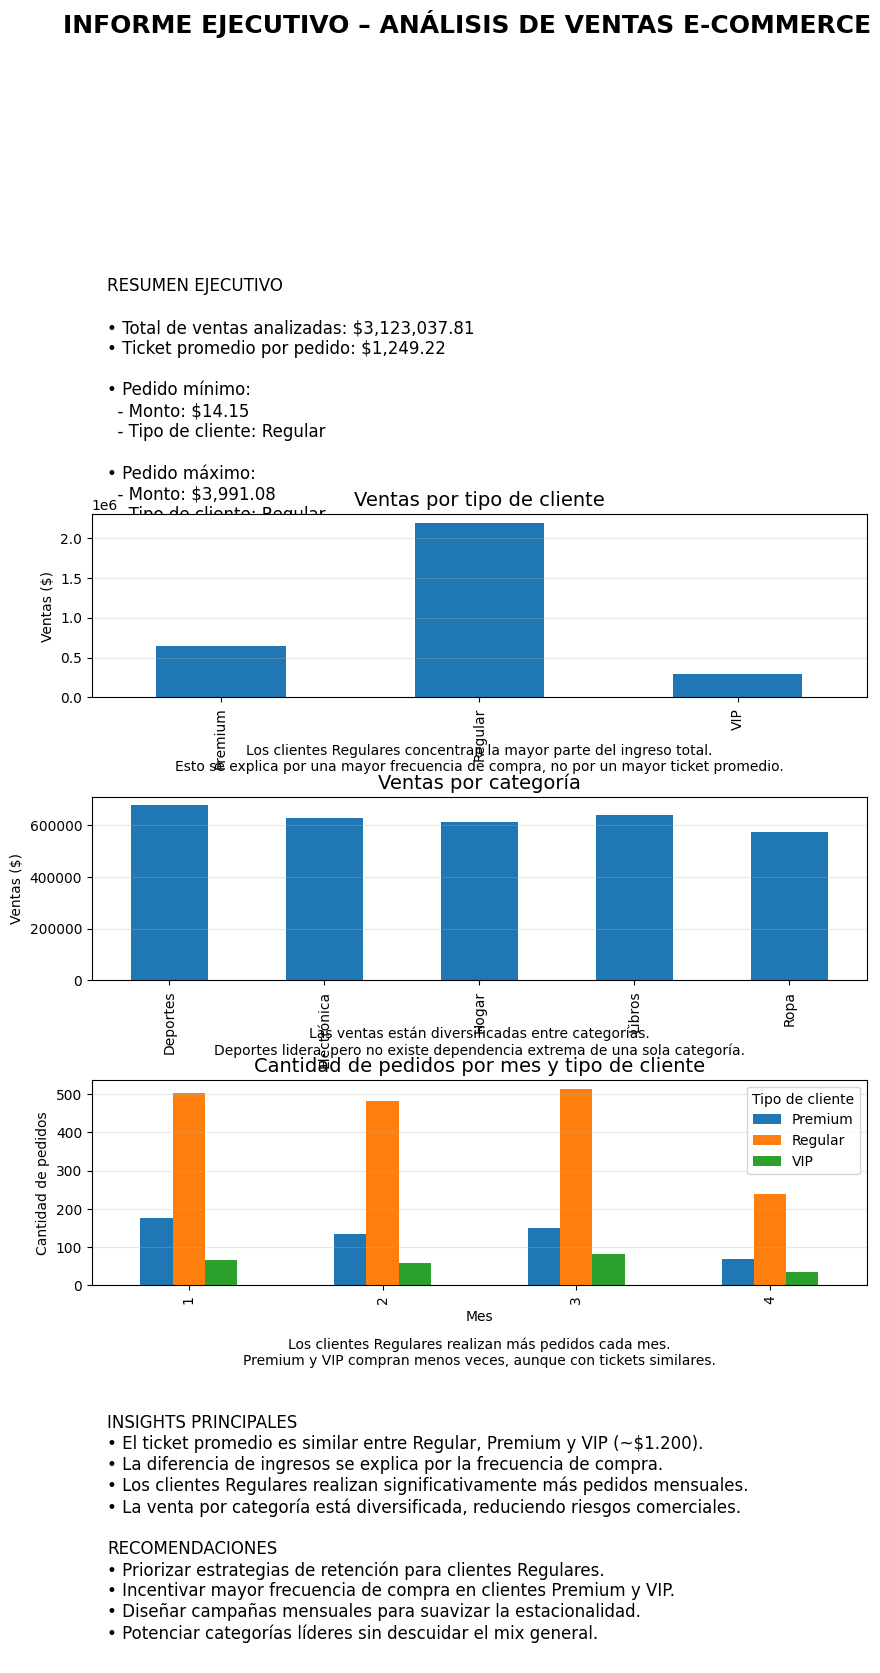

Reporte ejecutivo exportado correctamente como: eda_completo_reporte_dia5.pdf


In [43]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ===============================
# PREPARACIÓN DE MÉTRICAS
# ===============================

total_ventas = df['total_pedido'].sum()
ticket_promedio = df['total_pedido'].mean()

pedido_min = df.loc[df['total_pedido'].idxmin()]
pedido_max = df.loc[df['total_pedido'].idxmax()]

ventas_cliente = df.groupby('tipo_cliente')['total_pedido'].sum()
ventas_categoria = df.groupby('categoria')['total_pedido'].sum()
ventas_region = df.groupby('region')['total_pedido'].sum().sort_values(ascending=False).head(5)

ventas_mes_cliente = (
    df.groupby(['mes', 'tipo_cliente'])
    .size()
    .unstack()
)

# ===============================
# FIGURA Y LAYOUT PROFESIONAL
# ===============================

fig = plt.figure(figsize=(10, 16))
gs = GridSpec(
    nrows=6,
    ncols=1,
    height_ratios=[1.2, 2.2, 2.5, 2.5, 2.8, 2.3],
    figure=fig
)

fig.suptitle(
    "INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE",
    fontsize=18,
    fontweight='bold',
    y=0.995
)

# ===============================
# 1️⃣ RESUMEN EJECUTIVO
# ===============================

ax_resumen = fig.add_subplot(gs[1])
ax_resumen.axis('off')

resumen = f"""
RESUMEN EJECUTIVO

• Total de ventas analizadas: ${total_ventas:,.2f}
• Ticket promedio por pedido: ${ticket_promedio:,.2f}

• Pedido mínimo:
  - Monto: ${pedido_min['total_pedido']:,.2f}
  - Tipo de cliente: {pedido_min['tipo_cliente']}

• Pedido máximo:
  - Monto: ${pedido_max['total_pedido']:,.2f}
  - Tipo de cliente: {pedido_max['tipo_cliente']}

• Top 5 regiones por ventas:
""" + "\n".join([f"  - {r}: ${v:,.0f}" for r, v in ventas_region.items()])

ax_resumen.text(0.02, 0.98, resumen, va='top', fontsize=12)

# ===============================
# 2️⃣ VENTAS POR TIPO DE CLIENTE
# ===============================

ax1 = fig.add_subplot(gs[2])
ventas_cliente.plot(kind='bar', ax=ax1)
ax1.set_title("Ventas por tipo de cliente", fontsize=14)
ax1.set_ylabel("Ventas ($)")
ax1.set_xlabel("")
ax1.grid(axis='y', alpha=0.3)

ax1.text(
    0.5, -0.25,
    "Los clientes Regulares concentran la mayor parte del ingreso total.\n"
    "Esto se explica por una mayor frecuencia de compra, no por un mayor ticket promedio.",
    ha='center', va='top', transform=ax1.transAxes, fontsize=10
)

# ===============================
# 3️⃣ VENTAS POR CATEGORÍA
# ===============================

ax2 = fig.add_subplot(gs[3])
ventas_categoria.plot(kind='bar', ax=ax2)
ax2.set_title("Ventas por categoría", fontsize=14)
ax2.set_ylabel("Ventas ($)")
ax2.set_xlabel("")
ax2.grid(axis='y', alpha=0.3)

ax2.text(
    0.5, -0.25,
    "Las ventas están diversificadas entre categorías.\n"
    "Deportes lidera, pero no existe dependencia extrema de una sola categoría.",
    ha='center', va='top', transform=ax2.transAxes, fontsize=10
)

# ===============================
# 4️⃣ PEDIDOS POR MES Y TIPO DE CLIENTE
# ===============================

ax3 = fig.add_subplot(gs[4])
ventas_mes_cliente.plot(kind='bar', ax=ax3)
ax3.set_title("Cantidad de pedidos por mes y tipo de cliente", fontsize=14)
ax3.set_ylabel("Cantidad de pedidos")
ax3.set_xlabel("Mes")
ax3.legend(title="Tipo de cliente")
ax3.grid(axis='y', alpha=0.3)

ax3.text(
    0.5, -0.25,
    "Los clientes Regulares realizan más pedidos cada mes.\n"
    "Premium y VIP compran menos veces, aunque con tickets similares.",
    ha='center', va='top', transform=ax3.transAxes, fontsize=10
)

# ===============================
# 5️⃣ INSIGHTS Y RECOMENDACIONES
# ===============================

ax_final = fig.add_subplot(gs[5])
ax_final.axis('off')

texto_final = """
INSIGHTS PRINCIPALES
• El ticket promedio es similar entre Regular, Premium y VIP (~$1.200).
• La diferencia de ingresos se explica por la frecuencia de compra.
• Los clientes Regulares realizan significativamente más pedidos mensuales.
• La venta por categoría está diversificada, reduciendo riesgos comerciales.

RECOMENDACIONES
• Priorizar estrategias de retención para clientes Regulares.
• Incentivar mayor frecuencia de compra en clientes Premium y VIP.
• Diseñar campañas mensuales para suavizar la estacionalidad.
• Potenciar categorías líderes sin descuidar el mix general.
"""

ax_final.text(0.02, 0.95, texto_final, va='top', fontsize=12)

# ===============================
# EXPORTAR A PDF
# ===============================
plt.subplots_adjust(
    top=0.96,
    bottom=0.03,
    hspace=0.6
)

output_file = "eda_completo_reporte_dia5.pdf"
plt.savefig(output_file, format="pdf", bbox_inches="tight")
plt.show()
plt.close()

print(f"Reporte ejecutivo exportado correctamente como: {output_file}")

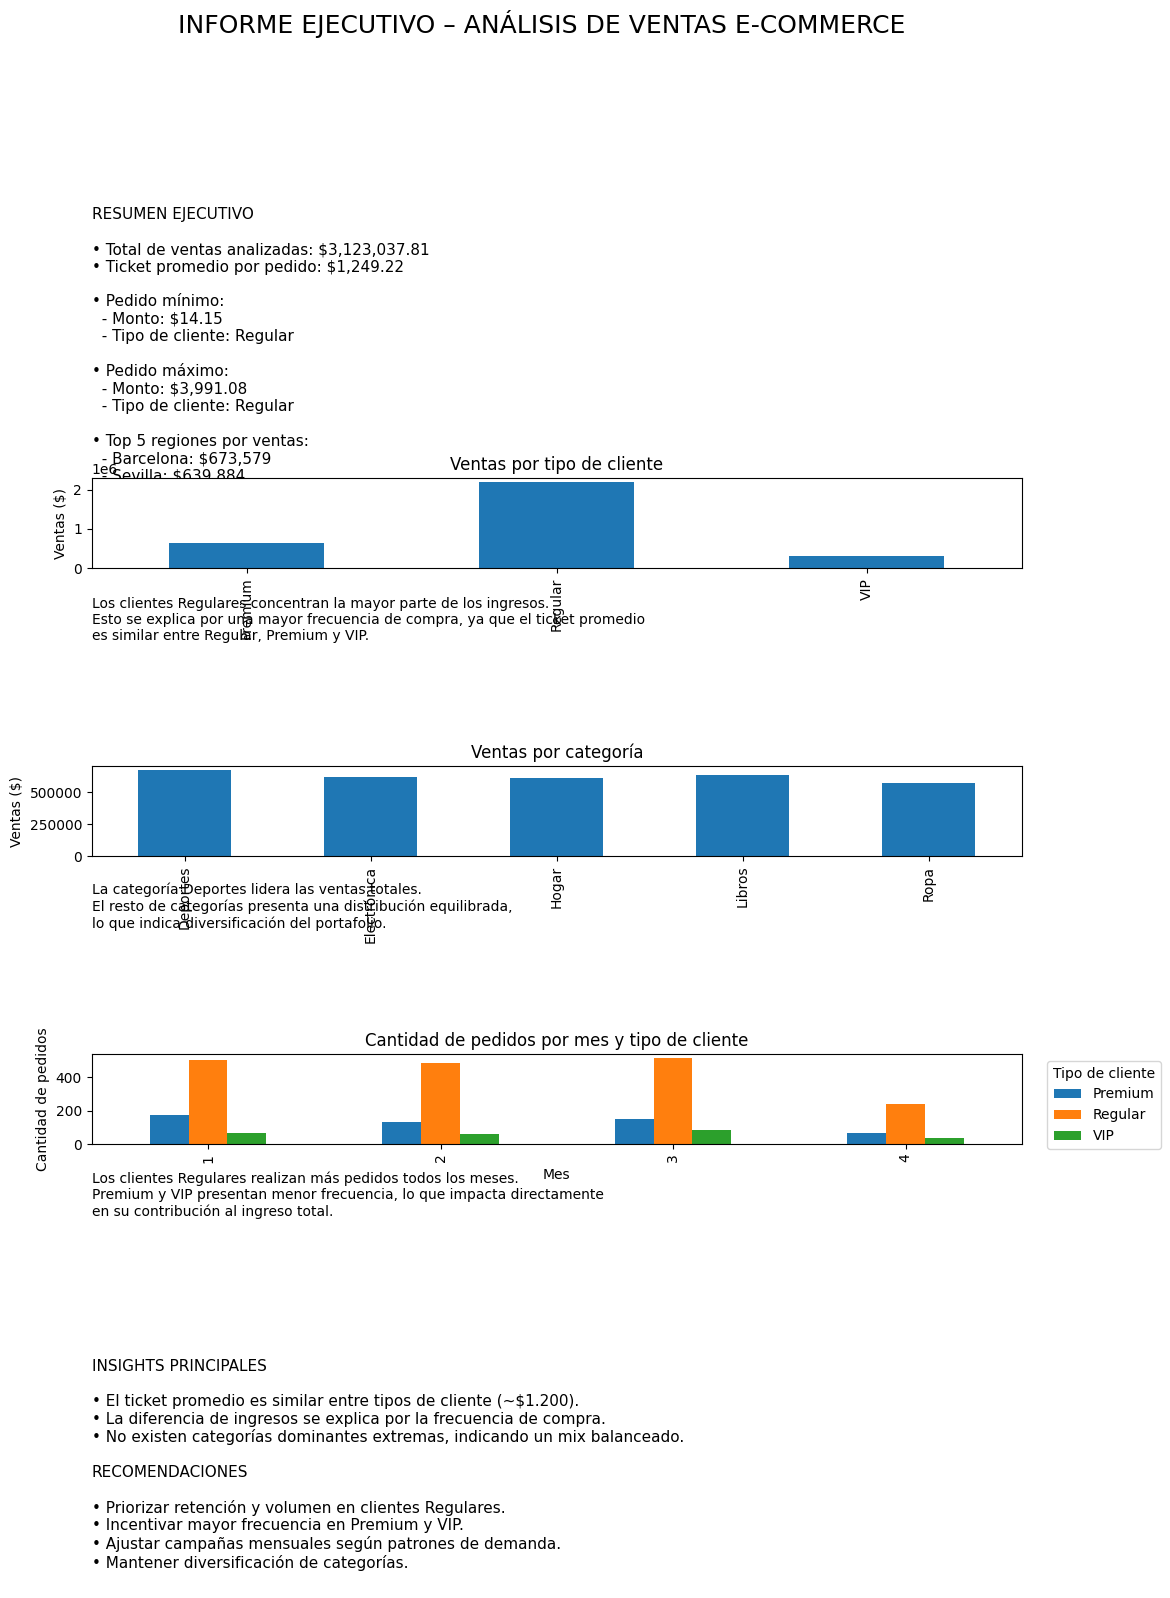

Reporte exportado correctamente como: eda_completo_reporte_dia5.pdf


In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec

# ===============================
# MÉTRICAS
# ===============================

total_ventas = df['total_pedido'].sum()
ticket_promedio = df['total_pedido'].mean()

pedido_min = df.loc[df['total_pedido'].idxmin()]
pedido_max = df.loc[df['total_pedido'].idxmax()]

ventas_cliente = df.groupby('tipo_cliente')['total_pedido'].sum()
ventas_categoria = df.groupby('categoria')['total_pedido'].sum()
ventas_region = df.groupby('region')['total_pedido'].sum().sort_values(ascending=False).head(5)

ventas_mes_cliente = (
    df.groupby(['mes', 'tipo_cliente'])
    .size()
    .unstack()
)

# ===============================
# FIGURA Y GRID
# ===============================

fig = plt.figure(figsize=(12, 18))
gs = GridSpec(10, 1, figure=fig, hspace=0.6)

fig.suptitle(
    "INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE",
    fontsize=18,
    y=0.98
)

# ===============================
# RESUMEN EJECUTIVO
# ===============================

ax_resumen = fig.add_subplot(gs[0:2, 0])
ax_resumen.axis('off')

resumen = f"""
RESUMEN EJECUTIVO

• Total de ventas analizadas: ${total_ventas:,.2f}
• Ticket promedio por pedido: ${ticket_promedio:,.2f}

• Pedido mínimo:
  - Monto: ${pedido_min['total_pedido']:,.2f}
  - Tipo de cliente: {pedido_min['tipo_cliente']}

• Pedido máximo:
  - Monto: ${pedido_max['total_pedido']:,.2f}
  - Tipo de cliente: {pedido_max['tipo_cliente']}

• Top 5 regiones por ventas:
""" + "\n".join([f"  - {r}: ${v:,.0f}" for r, v in ventas_region.items()])

ax_resumen.text(0, 1, resumen, fontsize=11, va='top')

# ===============================
# GRÁFICO 1 – TIPO DE CLIENTE
# ===============================

ax1 = fig.add_subplot(gs[2, 0])
ventas_cliente.plot(kind='bar', ax=ax1)
ax1.set_title("Ventas por tipo de cliente")
ax1.set_ylabel("Ventas ($)")
ax1.set_xlabel("")

ax_desc1 = fig.add_subplot(gs[3, 0])
ax_desc1.axis('off')
ax_desc1.text(
    0, 0.8,
    "Los clientes Regulares concentran la mayor parte de los ingresos.\n"
    "Esto se explica por una mayor frecuencia de compra, ya que el ticket promedio\n"
    "es similar entre Regular, Premium y VIP.",
    fontsize=10
)

# ===============================
# GRÁFICO 2 – CATEGORÍAS
# ===============================

ax2 = fig.add_subplot(gs[4, 0])
ventas_categoria.plot(kind='bar', ax=ax2)
ax2.set_title("Ventas por categoría")
ax2.set_ylabel("Ventas ($)")
ax2.set_xlabel("")

ax_desc2 = fig.add_subplot(gs[5, 0])
ax_desc2.axis('off')
ax_desc2.text(
    0, 0.8,
    "La categoría Deportes lidera las ventas totales.\n"
    "El resto de categorías presenta una distribución equilibrada,\n"
    "lo que indica diversificación del portafolio.",
    fontsize=10
)

# ===============================
# GRÁFICO 3 – PEDIDOS POR MES
# ===============================

ax3 = fig.add_subplot(gs[6, 0])
ventas_mes_cliente.plot(kind='bar', ax=ax3)
ax3.set_title("Cantidad de pedidos por mes y tipo de cliente")
ax3.set_ylabel("Cantidad de pedidos")
ax3.set_xlabel("Mes")
ax3.legend(title="Tipo de cliente", bbox_to_anchor=(1.02, 1), loc="upper left")

ax_desc3 = fig.add_subplot(gs[7, 0])
ax_desc3.axis('off')
ax_desc3.text(
    0, 0.8,
    "Los clientes Regulares realizan más pedidos todos los meses.\n"
    "Premium y VIP presentan menor frecuencia, lo que impacta directamente\n"
    "en su contribución al ingreso total.",
    fontsize=10
)

# ===============================
# INSIGHTS Y RECOMENDACIONES
# ===============================

ax_final = fig.add_subplot(gs[8:10, 0])
ax_final.axis('off')

final_text = """
INSIGHTS PRINCIPALES

• El ticket promedio es similar entre tipos de cliente (~$1.200).
• La diferencia de ingresos se explica por la frecuencia de compra.
• No existen categorías dominantes extremas, indicando un mix balanceado.

RECOMENDACIONES

• Priorizar retención y volumen en clientes Regulares.
• Incentivar mayor frecuencia en Premium y VIP.
• Ajustar campañas mensuales según patrones de demanda.
• Mantener diversificación de categorías.
"""

ax_final.text(0, 1, final_text, fontsize=11, va='top')

# ===============================
# EXPORTAR PDF
# ===============================

output_file = "eda_completo_reporte_dia5.pdf"
plt.savefig(output_file, bbox_inches="tight")
plt.show()
plt.close()

print(f"Reporte exportado correctamente como: {output_file}")

In [45]:
pip install reportlab

Note: you may need to restart the kernel to use updated packages.


In [46]:
# =========================================
# INFORME EJECUTIVO EDA – DÍA 5
# EXPORTABLE PDF CON REPORTLAB
# =========================================

from reportlab.platypus import (
    SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
)
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.pagesizes import A4
from reportlab.lib.enums import TA_LEFT, TA_CENTER
from reportlab.lib.units import cm

import matplotlib.pyplot as plt

# =========================================
# 1️⃣ GENERAR GRÁFICOS (SE GUARDAN COMO PNG)
# =========================================

# Ventas por tipo de cliente
ventas_cliente = df.groupby('tipo_cliente')['total_pedido'].sum()

plt.figure(figsize=(6,4))
ventas_cliente.plot(kind='bar')
plt.title("Ventas por tipo de cliente")
plt.ylabel("Ventas ($)")
plt.xlabel("Tipo de cliente")
plt.tight_layout()
plt.savefig("ventas_tipo_cliente.png")
plt.close()

# Ventas por categoría
ventas_categoria = df.groupby('categoria')['total_pedido'].sum()

plt.figure(figsize=(6,4))
ventas_categoria.plot(kind='bar')
plt.title("Ventas por categoría")
plt.ylabel("Ventas ($)")
plt.xlabel("Categoría")
plt.tight_layout()
plt.savefig("ventas_categoria.png")
plt.close()

# Pedidos por mes y tipo de cliente
ventas_mes_cliente = (
    df.groupby(['mes', 'tipo_cliente'])
    .size()
    .unstack()
)

plt.figure(figsize=(6,4))
ventas_mes_cliente.plot(kind='bar')
plt.title("Cantidad de pedidos por mes y tipo de cliente")
plt.ylabel("Cantidad de pedidos")
plt.xlabel("Mes")
plt.legend(title="Tipo de cliente")
plt.tight_layout()
plt.savefig("pedidos_mes_cliente.png")
plt.close()

# =========================================
# 2️⃣ MÉTRICAS PARA EL REPORTE
# =========================================

total_ventas = df['total_pedido'].sum()
ticket_promedio = df['total_pedido'].mean()

pedido_min = df.loc[df['total_pedido'].idxmin()]
pedido_max = df.loc[df['total_pedido'].idxmax()]

ventas_region = (
    df.groupby('region')['total_pedido']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# =========================================
# 3️⃣ CREACIÓN DEL PDF
# =========================================

doc = SimpleDocTemplate(
    "eda_completo_reporte_dia5.pdf",
    pagesize=A4,
    rightMargin=2*cm,
    leftMargin=2*cm,
    topMargin=2*cm,
    bottomMargin=2*cm
)

styles = getSampleStyleSheet()

styles.add(ParagraphStyle(
    name="Titulo",
    fontSize=18,
    alignment=TA_CENTER,
    spaceAfter=20
))

styles.add(ParagraphStyle(
    name="Subtitulo",
    fontSize=14,
    spaceAfter=12,
    spaceBefore=20
))

styles.add(ParagraphStyle(
    name="Texto",
    fontSize=11,
    spaceAfter=10,
    alignment=TA_LEFT
))

contenido = []

# =========================================
# 4️⃣ TÍTULO
# =========================================

contenido.append(Paragraph(
    "INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE",
    styles["Titulo"]
))

# =========================================
# 5️⃣ RESUMEN EJECUTIVO
# =========================================

resumen = f"""
<b>Resumen Ejecutivo</b><br/><br/>

• <b>Total de ventas analizadas:</b> ${total_ventas:,.2f}<br/>
• <b>Ticket promedio por pedido:</b> ${ticket_promedio:,.2f}<br/><br/>

<b>Pedido mínimo:</b><br/>
- Monto: ${pedido_min['total_pedido']:,.2f}<br/>
- Tipo de cliente: {pedido_min['tipo_cliente']}<br/><br/>

<b>Pedido máximo:</b><br/>
- Monto: ${pedido_max['total_pedido']:,.2f}<br/>
- Tipo de cliente: {pedido_max['tipo_cliente']}<br/><br/>

<b>Top 5 regiones por ventas:</b><br/>
""" + "<br/>".join([f"- {r}: ${v:,.0f}" for r, v in ventas_region.items()])

contenido.append(Paragraph(resumen, styles["Texto"]))

# =========================================
# 6️⃣ GRÁFICOS (UNO DEBAJO DEL OTRO)
# =========================================

contenido.append(Spacer(1, 20))
contenido.append(Paragraph("Visualizaciones Clave", styles["Subtitulo"]))

for img, desc in [
    ("ventas_tipo_cliente.png",
     "Los clientes Regulares concentran la mayor parte de los ingresos debido a una mayor frecuencia de compra."),
    ("ventas_categoria.png",
     "La categoría Deportes lidera las ventas, seguida por Electrónica y Libros."),
    ("pedidos_mes_cliente.png",
     "Los clientes Regulares realizan más pedidos mensuales que Premium y VIP.")
]:
    contenido.append(Image(img, width=14*cm, height=8*cm))
    contenido.append(Spacer(1, 6))
    contenido.append(Paragraph(desc, styles["Texto"]))
    contenido.append(Spacer(1, 16))

# =========================================
# 7️⃣ INSIGHTS
# =========================================

contenido.append(Paragraph("Insights Principales", styles["Subtitulo"]))

insights = """
• El ticket promedio es similar entre tipos de clientes (~$1.200).<br/>
• La diferencia de ingresos se explica por la frecuencia de compra.<br/>
• Los clientes Regulares realizan más pedidos mensuales.<br/>
• El portafolio de categorías muestra diversificación saludable.
"""

contenido.append(Paragraph(insights, styles["Texto"]))

# =========================================
# 8️⃣ RECOMENDACIONES
# =========================================

contenido.append(Paragraph("Recomendaciones", styles["Subtitulo"]))

recomendaciones = """
• Priorizar estrategias de retención para clientes Regulares.<br/>
• Incentivar mayor frecuencia de compra en Premium y VIP.<br/>
• Diseñar campañas mensuales para suavizar estacionalidad.<br/>
• Potenciar categorías líderes sin descuidar el mix general.
"""

contenido.append(Paragraph(recomendaciones, styles["Texto"]))

# =========================================
# 9️⃣ GENERAR PDF
# =========================================

doc.build(contenido)

print("✅ Reporte generado correctamente: eda_completo_reporte_dia5.pdf")

✅ Reporte generado correctamente: eda_completo_reporte_dia5.pdf


<Figure size 600x400 with 0 Axes>

In [47]:
from reportlab.platypus import (
    SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
)
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.pagesizes import A4
from reportlab.lib.enums import TA_LEFT, TA_CENTER
from reportlab.lib.units import cm

import matplotlib.pyplot as plt

# =========================================
# 1️⃣ GENERAR GRÁFICOS (PNG)
# =========================================

ventas_cliente = df.groupby('tipo_cliente')['total_pedido'].sum()
ventas_categoria = df.groupby('categoria')['total_pedido'].sum()
ventas_mes_cliente = df.groupby(['mes', 'tipo_cliente']).size().unstack()

def guardar_grafico(data, kind, title, xlabel, ylabel, filename, legend=True):
    plt.figure(figsize=(6,4))
    ax = data.plot(kind=kind)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Eliminar leyenda solo si existe
    if not legend and ax.get_legend() is not None:
        ax.get_legend().remove()

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

guardar_grafico(
    ventas_cliente, "bar",
    "Ventas por tipo de cliente",
    "Tipo de cliente", "Ventas ($)",
    "ventas_tipo_cliente.png",
    legend=False
)

guardar_grafico(
    ventas_categoria, "bar",
    "Ventas por categoría",
    "Categoría", "Ventas ($)",
    "ventas_categoria.png",
    legend=False
)

guardar_grafico(
    ventas_mes_cliente, "bar",
    "Pedidos por mes y tipo de cliente",
    "Mes", "Cantidad de pedidos",
    "pedidos_mes_cliente.png"
)

# =========================================
# 2️⃣ MÉTRICAS CLAVE
# =========================================

total_ventas = df['total_pedido'].sum()
ticket_promedio = df['total_pedido'].mean()

pedido_min = df.loc[df['total_pedido'].idxmin()]
pedido_max = df.loc[df['total_pedido'].idxmax()]

ventas_region = (
    df.groupby('region')['total_pedido']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# =========================================
# 3️⃣ CONFIGURACIÓN PDF
# =========================================

doc = SimpleDocTemplate(
    "eda_completo_reporte_dia5.pdf",
    pagesize=A4,
    rightMargin=2*cm,
    leftMargin=2*cm,
    topMargin=2*cm,
    bottomMargin=2*cm
)

styles = getSampleStyleSheet()

styles.add(ParagraphStyle(
    name="Titulo",
    fontSize=18,
    alignment=TA_CENTER,
    spaceAfter=20
))

styles.add(ParagraphStyle(
    name="Subtitulo",
    fontSize=14,
    spaceAfter=14,
    spaceBefore=20
))

styles.add(ParagraphStyle(
    name="Texto",
    fontSize=11,
    spaceAfter=10,
    alignment=TA_LEFT
))

contenido = []

# =========================================
# 📄 PÁGINA 1 – RESUMEN EJECUTIVO
# =========================================

contenido.append(Paragraph(
    "INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE",
    styles["Titulo"]
))

resumen = f"""
<b>Resumen Ejecutivo</b><br/><br/>

• <b>Total de ventas analizadas:</b> ${total_ventas:,.2f}<br/>
• <b>Ticket promedio por pedido:</b> ${ticket_promedio:,.2f}<br/><br/>

<b>Pedido mínimo</b><br/>
Monto: ${pedido_min['total_pedido']:,.2f} — Cliente {pedido_min['tipo_cliente']}<br/><br/>

<b>Pedido máximo</b><br/>
Monto: ${pedido_max['total_pedido']:,.2f} — Cliente {pedido_max['tipo_cliente']}<br/><br/>

<b>Top 5 regiones por ventas</b><br/>
""" + "<br/>".join([f"- {r}: ${v:,.0f}" for r, v in ventas_region.items()])

contenido.append(Paragraph(resumen, styles["Texto"]))

contenido.append(Spacer(1, 16))
contenido.append(Paragraph("Ventas por tipo de cliente", styles["Subtitulo"]))
contenido.append(Image("ventas_tipo_cliente.png", width=14*cm, height=8*cm))

contenido.append(Paragraph(
    "Los clientes Regulares concentran la mayor parte de los ingresos debido a una mayor frecuencia de compra.",
    styles["Texto"]
))

contenido.append(PageBreak())

# =========================================
# 📄 PÁGINA 2 – GRÁFICOS + INSIGHTS
# =========================================

contenido.append(Paragraph("Ventas por categoría", styles["Subtitulo"]))
contenido.append(Image("ventas_categoria.png", width=14*cm, height=8*cm))
contenido.append(Paragraph(
    "La categoría Deportes lidera las ventas totales, seguida por Electrónica y Libros.",
    styles["Texto"]
))

contenido.append(Spacer(1, 14))

contenido.append(Paragraph("Pedidos por mes y tipo de cliente", styles["Subtitulo"]))
contenido.append(Image("pedidos_mes_cliente.png", width=14*cm, height=8*cm))
contenido.append(Paragraph(
    "Los clientes Regulares realizan más pedidos mensuales, explicando su mayor contribución al ingreso.",
    styles["Texto"]
))

contenido.append(Spacer(1, 18))

contenido.append(Paragraph("Insights Principales", styles["Subtitulo"]))
contenido.append(Paragraph("""
• El ticket promedio es similar entre tipos de clientes (~$1.200).<br/>
• La diferencia de ingresos se explica por la frecuencia de compra.<br/>
• Los clientes Regulares realizan más pedidos mensuales.<br/>
• El mix de categorías muestra diversificación saludable.
""", styles["Texto"]))

contenido.append(Paragraph("Recomendaciones", styles["Subtitulo"]))
contenido.append(Paragraph("""
• Priorizar estrategias de retención para clientes Regulares.<br/>
• Incentivar mayor frecuencia de compra en Premium y VIP.<br/>
• Diseñar campañas mensuales para suavizar estacionalidad.<br/>
• Potenciar categorías líderes sin descuidar el mix general.
""", styles["Texto"]))

# =========================================
# 4️⃣ GENERAR PDF
# =========================================

doc.build(contenido)

print("✅ Informe ejecutivo generado en 2 páginas: eda_completo_reporte_dia5.pdf")

✅ Informe ejecutivo generado en 2 páginas: eda_completo_reporte_dia5.pdf


<Figure size 600x400 with 0 Axes>

In [48]:
from reportlab.platypus import (
    SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
)
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import cm

# ===============================
# CONFIGURACIÓN PDF
# ===============================

output_file = "eda_completo_reporte_dia5.pdf"

doc = SimpleDocTemplate(
    output_file,
    pagesize=A4,
    rightMargin=2*cm,
    leftMargin=2*cm,
    topMargin=2*cm,
    bottomMargin=2*cm
)

styles = getSampleStyleSheet()
story = []

# ===============================
# PÁGINA 1 — RESUMEN + GRÁFICOS
# ===============================

story.append(Paragraph(
    "<b>INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE</b>",
    styles["Title"]
))
story.append(Spacer(1, 14))

story.append(Paragraph("<b>Resumen Ejecutivo</b>", styles["Heading2"]))
story.append(Spacer(1, 10))

resumen_texto = f"""
• Total de ventas analizadas: <b>${total_ventas:,.2f}</b><br/>
• Ticket promedio por pedido: <b>${ticket_promedio:,.2f}</b><br/><br/>

<b>Pedido mínimo</b><br/>
Monto: ${pedido_min['total_pedido']:,.2f}<br/>
Tipo de cliente: {pedido_min['tipo_cliente']}<br/><br/>

<b>Pedido máximo</b><br/>
Monto: ${pedido_max['total_pedido']:,.2f}<br/>
Tipo de cliente: {pedido_max['tipo_cliente']}<br/><br/>

<b>Top 5 regiones por ventas</b><br/>
""" + "<br/>".join([f"{r}: ${v:,.0f}" for r, v in ventas_region.items()])

story.append(Paragraph(resumen_texto, styles["Normal"]))
story.append(Spacer(1, 20))

# --- Gráficos
story.append(Paragraph("<b>Ventas por tipo de cliente</b>", styles["Heading3"]))
story.append(Spacer(1, 6))
story.append(Image("ventas_tipo_cliente.png", width=15*cm, height=7*cm))
story.append(Spacer(1, 14))

story.append(Paragraph("<b>Ventas por categoría</b>", styles["Heading3"]))
story.append(Spacer(1, 6))
story.append(Image("ventas_categoria.png", width=15*cm, height=7*cm))

# 🚨 CORTE DE PÁGINA EXPLÍCITO
story.append(PageBreak())

# ===============================
# PÁGINA 2 — INSIGHTS Y RECOMENDACIONES
# ===============================

story.append(Paragraph("<b>Insights Principales</b>", styles["Heading2"]))
story.append(Spacer(1, 10))

insights = """
• El ticket promedio es similar entre tipos de clientes (~$1.200).<br/>
• La diferencia en ingresos se explica por la frecuencia de compra.<br/>
• Los clientes Regulares concentran más pedidos mensuales.<br/>
• No existe una categoría dominante extrema, indicando diversificación.
"""

story.append(Paragraph(insights, styles["Normal"]))
story.append(Spacer(1, 20))

story.append(Paragraph("<b>Recomendaciones</b>", styles["Heading2"]))
story.append(Spacer(1, 10))

recomendaciones = """
• Priorizar estrategias de retención para clientes Regulares.<br/>
• Incentivar mayor frecuencia de compra en clientes Premium y VIP.<br/>
• Diseñar campañas mensuales para suavizar estacionalidad.<br/>
• Potenciar categorías líderes sin descuidar el mix general.
"""

story.append(Paragraph(recomendaciones, styles["Normal"]))

# ===============================
# GENERAR PDF
# ===============================

doc.build(story)

print("PDF generado correctamente en 2 páginas:", output_file)

PDF generado correctamente en 2 páginas: eda_completo_reporte_dia5.pdf


In [49]:
import matplotlib.pyplot as plt
import os

def guardar_grafico(data, kind, title, xlabel, ylabel, filename, legend=True):
    plt.figure(figsize=(8, 4))
    ax = data.plot(kind=kind)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if legend and ax.get_legend() is not None:
        ax.legend(title=data.columns.name if hasattr(data, "columns") else None)
    elif not legend and ax.get_legend() is not None:
        ax.get_legend().remove()

    plt.tight_layout()
    plt.savefig(filename, dpi=150)
    plt.close()

    if not os.path.exists(filename):
        raise FileNotFoundError(f"No se pudo crear el archivo {filename}")

In [50]:
guardar_grafico(
    ventas_cliente,
    kind="bar",
    title="Ventas por tipo de cliente",
    xlabel="Tipo de cliente",
    ylabel="Ventas ($)",
    filename="ventas_tipo_cliente.png",
    legend=False
)

guardar_grafico(
    ventas_categoria,
    kind="bar",
    title="Ventas por categoría",
    xlabel="Categoría",
    ylabel="Ventas ($)",
    filename="ventas_categoria.png",
    legend=False
)

guardar_grafico(
    ventas_mes_cliente,
    kind="bar",
    title="Pedidos por mes y tipo de cliente",
    xlabel="Mes",
    ylabel="Cantidad de pedidos",
    filename="pedidos_mes_cliente.png",
    legend=True
)

print("Gráficos generados correctamente")

Gráficos generados correctamente


<Figure size 800x400 with 0 Axes>

In [51]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import cm

output_file = "eda_completo_reporte_dia5.pdf"

doc = SimpleDocTemplate(
    output_file,
    pagesize=A4,
    rightMargin=2*cm,
    leftMargin=2*cm,
    topMargin=2*cm,
    bottomMargin=2*cm
)

styles = getSampleStyleSheet()
story = []

# ===============================
# PÁGINA 1
# ===============================

story.append(Paragraph(
    "<b>INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE</b>",
    styles["Title"]
))
story.append(Spacer(1, 14))

story.append(Paragraph("<b>Resumen Ejecutivo</b>", styles["Heading2"]))
story.append(Spacer(1, 10))

resumen = f"""
• Total de ventas analizadas: <b>${total_ventas:,.2f}</b><br/>
• Ticket promedio por pedido: <b>${ticket_promedio:,.2f}</b><br/><br/>

<b>Pedido mínimo</b><br/>
Monto: ${pedido_min['total_pedido']:,.2f}<br/>
Tipo de cliente: {pedido_min['tipo_cliente']}<br/><br/>

<b>Pedido máximo</b><br/>
Monto: ${pedido_max['total_pedido']:,.2f}<br/>
Tipo de cliente: {pedido_max['tipo_cliente']}<br/><br/>

<b>Top 5 regiones por ventas</b><br/>
""" + "<br/>".join([f"{r}: ${v:,.0f}" for r, v in ventas_region.items()])

story.append(Paragraph(resumen, styles["Normal"]))
story.append(Spacer(1, 18))

story.append(Paragraph("<b>Ventas por tipo de cliente</b>", styles["Heading3"]))
story.append(Image("ventas_tipo_cliente.png", width=15*cm, height=7*cm))
story.append(Spacer(1, 12))

story.append(Paragraph("<b>Ventas por categoría</b>", styles["Heading3"]))
story.append(Image("ventas_categoria.png", width=15*cm, height=7*cm))

story.append(PageBreak())

# ===============================
# PÁGINA 2
# ===============================

story.append(Paragraph("<b>Insights Principales</b>", styles["Heading2"]))
story.append(Spacer(1, 10))

story.append(Paragraph("""
• El ticket promedio es similar entre tipos de clientes (~$1.200).<br/>
• La diferencia de ingresos se explica por la frecuencia de compra.<br/>
• Los clientes Regulares concentran mayor volumen de pedidos.<br/>
• El mix de categorías muestra una demanda diversificada.
""", styles["Normal"]))

story.append(Spacer(1, 20))

story.append(Paragraph("<b>Recomendaciones</b>", styles["Heading2"]))
story.append(Spacer(1, 10))

story.append(Paragraph("""
• Priorizar estrategias de retención para clientes Regulares.<br/>
• Incentivar mayor frecuencia de compra en Premium y VIP.<br/>
• Diseñar campañas mensuales para suavizar la estacionalidad.<br/>
• Potenciar categorías líderes sin descuidar el mix general.
""", styles["Normal"]))

doc.build(story)

print("PDF generado correctamente:", output_file)

PDF generado correctamente: eda_completo_reporte_dia5.pdf


In [52]:
from reportlab.platypus import (
    SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
)
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import cm

output_file = "eda_completo_reporte_dia5.pdf"

doc = SimpleDocTemplate(
    output_file,
    pagesize=A4,
    rightMargin=2*cm,
    leftMargin=2*cm,
    topMargin=2*cm,
    bottomMargin=2*cm
)

styles = getSampleStyleSheet()
story = []

# =================================================
# 📄 PÁGINA 1 — RESUMEN EJECUTIVO
# =================================================

story.append(Paragraph(
    "INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE",
    styles["Title"]
))
story.append(Spacer(1, 18))

story.append(Paragraph("Resumen Ejecutivo", styles["Heading2"]))
story.append(Spacer(1, 12))

resumen = f"""
<b>Total de ventas:</b> ${total_ventas:,.2f}<br/><br/>

<b>Ticket promedio por pedido:</b> ${ticket_promedio:,.2f}<br/><br/>

<b>Pedido mínimo</b><br/>
Monto: ${pedido_min['total_pedido']:,.2f}<br/>
Tipo de cliente: {pedido_min['tipo_cliente']}<br/><br/>

<b>Pedido máximo</b><br/>
Monto: ${pedido_max['total_pedido']:,.2f}<br/>
Tipo de cliente: {pedido_max['tipo_cliente']}<br/><br/>

<b>Top 5 regiones por ventas</b><br/>
""" + "<br/>".join([f"{r}: ${v:,.0f}" for r, v in ventas_region.items()])

story.append(Paragraph(resumen, styles["Normal"]))
story.append(Spacer(1, 24))

story.append(Paragraph("Insights Principales", styles["Heading2"]))
story.append(Spacer(1, 10))

story.append(Paragraph("""
• El ticket promedio es similar entre tipos de clientes (~$1.200).<br/>
• La diferencia de ingresos se explica por la frecuencia de compra.<br/>
• Los clientes Regulares concentran mayor volumen de pedidos.<br/>
• El mix de categorías es diversificado.
""", styles["Normal"]))

story.append(Spacer(1, 18))

story.append(Paragraph("Recomendaciones", styles["Heading2"]))
story.append(Spacer(1, 10))

story.append(Paragraph("""
• Priorizar la retención de clientes Regulares.<br/>
• Incentivar mayor frecuencia en Premium y VIP.<br/>
• Ajustar campañas según estacionalidad mensual.<br/>
• Mantener equilibrio entre categorías líderes.
""", styles["Normal"]))

story.append(PageBreak())

# =================================================
# 📄 PÁGINA 2 — VISUALIZACIONES
# =================================================

story.append(Paragraph("Visualizaciones Clave", styles["Title"]))
story.append(Spacer(1, 14))

story.append(Paragraph("Ventas por tipo de cliente", styles["Heading3"]))
story.append(Image("ventas_tipo_cliente.png", width=16*cm, height=5*cm))
story.append(Spacer(1, 12))

story.append(Paragraph("Ventas por categoría", styles["Heading3"]))
story.append(Image("ventas_categoria.png", width=16*cm, height=5*cm))
story.append(Spacer(1, 12))

story.append(Paragraph("Pedidos por mes y tipo de cliente", styles["Heading3"]))
story.append(Image("pedidos_mes_cliente.png", width=16*cm, height=5*cm))

# =================================================
# GENERAR PDF
# =================================================

doc.build(story)

print("PDF generado correctamente en 2 páginas:", output_file)

PDF generado correctamente en 2 páginas: eda_completo_reporte_dia5.pdf


In [53]:
from reportlab.platypus import (
    SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
)
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import cm

output_file = "eda_completo_reporte_dia5.pdf"

doc = SimpleDocTemplate(
    output_file,
    pagesize=A4,
    rightMargin=2*cm,
    leftMargin=2*cm,
    topMargin=2*cm,
    bottomMargin=2*cm
)

styles = getSampleStyleSheet()
story = []

# =================================================
# 📄 PÁGINA 1 — RESUMEN EJECUTIVO
# =================================================

story.append(Paragraph(
    "INFORME EJECUTIVO – ANÁLISIS DE VENTAS E-COMMERCE",
    styles["Title"]
))
story.append(Spacer(1, 20))

story.append(Paragraph("Resumen Ejecutivo", styles["Heading2"]))
story.append(Spacer(1, 12))

resumen = f"""
<b>Total de ventas analizadas:</b> ${total_ventas:,.2f}<br/><br/>

<b>Ticket promedio por pedido:</b> ${ticket_promedio:,.2f}<br/><br/>

<b>Pedido mínimo</b><br/>
Monto: ${pedido_min['total_pedido']:,.2f}<br/>
Tipo de cliente: {pedido_min['tipo_cliente']}<br/><br/>

<b>Pedido máximo</b><br/>
Monto: ${pedido_max['total_pedido']:,.2f}<br/>
Tipo de cliente: {pedido_max['tipo_cliente']}<br/><br/>

<b>Top 5 regiones por ventas</b><br/>
""" + "<br/>".join([f"{r}: ${v:,.0f}" for r, v in ventas_region.items()])

story.append(Paragraph(resumen, styles["Normal"]))
story.append(Spacer(1, 24))

story.append(Paragraph("Insights Principales", styles["Heading2"]))
story.append(Spacer(1, 10))

story.append(Paragraph("""
• El ticket promedio es similar entre tipos de clientes (~$1.200).<br/>
• La diferencia en ingresos se explica por la frecuencia de compra.<br/>
• Los clientes Regulares concentran el mayor volumen de pedidos.<br/>
• El mix de categorías es equilibrado, sin dependencia extrema.
""", styles["Normal"]))

story.append(Spacer(1, 18))

story.append(Paragraph("Recomendaciones", styles["Heading2"]))
story.append(Spacer(1, 10))

story.append(Paragraph("""
• Priorizar estrategias de retención para clientes Regulares.<br/>
• Incentivar mayor frecuencia de compra en Premium y VIP.<br/>
• Ajustar campañas según estacionalidad mensual.<br/>
• Potenciar categorías líderes manteniendo diversidad.
""", styles["Normal"]))

story.append(PageBreak())

# =================================================
# 📄 PÁGINA 2 — VISUALIZACIONES (PARTE 1)
# =================================================

story.append(Paragraph("Evidencia Visual – Parte 1", styles["Title"]))
story.append(Spacer(1, 18))

story.append(Paragraph("Ventas por tipo de cliente", styles["Heading3"]))
story.append(Spacer(1, 6))
story.append(Image("ventas_tipo_cliente.png", width=16*cm, height=7*cm))
story.append(Spacer(1, 16))

story.append(Paragraph("Ventas por categoría", styles["Heading3"]))
story.append(Spacer(1, 6))
story.append(Image("ventas_categoria.png", width=16*cm, height=7*cm))

story.append(PageBreak())

# =================================================
# 📄 PÁGINA 3 — VISUALIZACIONES (PARTE 2)
# =================================================

story.append(Paragraph("Evidencia Visual – Parte 2", styles["Title"]))
story.append(Spacer(1, 18))

story.append(Paragraph("Cantidad de pedidos por mes y tipo de cliente", styles["Heading3"]))
story.append(Spacer(1, 6))
story.append(Image("pedidos_mes_cliente.png", width=16*cm, height=8*cm))

# =================================================
# GENERAR PDF
# =================================================

doc.build(story)

print("PDF generado correctamente en 3 páginas:", output_file)

PDF generado correctamente en 3 páginas: eda_completo_reporte_dia5.pdf


In [54]:
import pandas as pd

# ===============================
# ARCHIVO DE EVIDENCIA EDA
# ===============================

output_excel = "evidencia_dataset_eda_dia5.xlsx"

with pd.ExcelWriter(output_excel, engine="openpyxl") as writer:

    # 1️⃣ Dataset completo
    df.to_excel(writer, sheet_name="dataset_completo", index=False)

    # 2️⃣ Descripción de columnas
    descripcion = pd.DataFrame({
        "columna": df.columns,
        "descripcion": [
            "Identificador único del pedido",
            "Fecha y hora del pedido",
            "Identificador del cliente",
            "Categoría del producto",
            "Precio unitario del producto",
            "Cantidad comprada",
            "Método de pago utilizado",
            "Región de compra",
            "Tipo de cliente",
            "Monto total del pedido",
            "Mes del pedido",
            "Día de la semana"
        ]
    })

    descripcion.to_excel(
        writer,
        sheet_name="descripcion_columnas",
        index=False
    )

    # 3️⃣ Estadísticos descriptivos clave
    estadisticos = df[
        ["precio_unitario", "cantidad", "total_pedido"]
    ].describe().round(2)

    estadisticos.to_excel(
        writer,
        sheet_name="estadisticos_clave"
    )

    # 4️⃣ Ventas por categoría
    ventas_categoria = (
        df.groupby("categoria")["total_pedido"]
        .agg(["count", "sum", "mean"])
        .round(2)
    )

    ventas_categoria.to_excel(
        writer,
        sheet_name="ventas_categoria"
    )

    # 5️⃣ Ventas por tipo de cliente
    ventas_cliente = (
        df.groupby("tipo_cliente")["total_pedido"]
        .agg(["count", "sum", "mean"])
        .round(2)
    )

    ventas_cliente.to_excel(
        writer,
        sheet_name="ventas_tipo_cliente"
    )

    # 6️⃣ Ventas por mes
    ventas_mes = (
        df.groupby("mes")["total_pedido"]
        .agg(["count", "sum", "mean"])
        .round(2)
    )

    ventas_mes.to_excel(
        writer,
        sheet_name="ventas_mes"
    )

print(f"Excel de evidencia generado correctamente: {output_excel}")

Excel de evidencia generado correctamente: evidencia_dataset_eda_dia5.xlsx


In [56]:
import pandas as pd

# ===============================
# ARCHIVO DE EVIDENCIA EDA – DÍA 5
# ===============================

output_excel = "Evidencia_Dia5_EDA_Ecommerce.xlsx"

# Verificación defensiva
assert 'df' in globals(), "ERROR: El DataFrame df no está cargado. Ejecuta antes la celda de creación del dataset."

with pd.ExcelWriter(output_excel, engine="openpyxl", mode="w") as writer:

    # 1️⃣ Dataset completo
    df.to_excel(
        writer,
        sheet_name="dataset_completo",
        index=False
    )

    # 2️⃣ Descripción de columnas
    descripcion_columnas = pd.DataFrame({
        "columna": df.columns,
        "descripcion": [
            "Identificador único del pedido",
            "Fecha y hora del pedido",
            "Identificador del cliente",
            "Categoría del producto",
            "Precio unitario del producto",
            "Cantidad comprada",
            "Método de pago utilizado",
            "Región de compra",
            "Tipo de cliente",
            "Monto total del pedido",
            "Mes del pedido",
            "Día de la semana"
        ]
    })

    descripcion_columnas.to_excel(
        writer,
        sheet_name="descripcion_columnas",
        index=False
    )

    # 3️⃣ Estadísticos descriptivos clave
    estadisticos = (
        df[["precio_unitario", "cantidad", "total_pedido"]]
        .describe()
        .round(2)
    )

    estadisticos.to_excel(
        writer,
        sheet_name="estadisticos_clave"
    )

    # 4️⃣ Ventas por categoría
    ventas_categoria = (
        df.groupby("categoria")["total_pedido"]
        .agg(["count", "sum", "mean"])
        .round(2)
    )

    ventas_categoria.to_excel(
        writer,
        sheet_name="ventas_categoria"
    )

    # 5️⃣ Ventas por tipo de cliente
    ventas_tipo_cliente = (
        df.groupby("tipo_cliente")["total_pedido"]
        .agg(["count", "sum", "mean"])
        .round(2)
    )

    ventas_tipo_cliente.to_excel(
        writer,
        sheet_name="ventas_tipo_cliente"
    )

    # 6️⃣ Ventas por mes
    ventas_mes = (
        df.groupby("mes")["total_pedido"]
        .agg(["count", "sum", "mean"])
        .round(2)
    )

    ventas_mes.to_excel(
        writer,
        sheet_name="ventas_mes"
    )

print(f"✅ Excel de evidencia generado correctamente: {output_excel}")

✅ Excel de evidencia generado correctamente: Evidencia_Dia5_EDA_Ecommerce.xlsx
